<a id="TOC"> </a> <p class='lead'> Content </p>

[About](#Abt)
[Fair ML Lifecycle](#FML)
[About data](#Ad)

1. [Loading libraries](#1)  
2. [Loading and preparing the data](#2)  
3. [Exploring data](#3)  
4. [Data bias detection](#4)  
5. [Removing bias from data using reweighing technique](#5)
    1. [Model development with and without weights](#5a)
    2. [Fairness metrics post model training](#5b)
6. [Accuracy-cost-fairness trade-off](#6) 
7. [Additive counterfactual fair model](#8)
    1. [Classification (multiple protected features)](#8a)
    2. [Regression (multiple protected features)](#8b)
    3. [Regression on counterfactual sensitive data (multiple protected features)](#8c)
8. [Reject option classifier](#R)
9. [Get in touch](#gt)


----

<a id="Abt"> </a> <p class='lead'> About </p>

The suitability of Machine Learning models is traditionally measured on its accuracy. A highly accurate model based on metrics like RMSE, MAPE, AUC, ROC, Gini, etc are considered to be high performing models. While such accuracy metrics important, are there other metrics that the data science community has been ignoring so far? The answer is yes—in the pursuit of accuracy, most models sacrifice “fairness” and “interpretability.” Rarely, a data scientist tries to dissect a model to find out if the model follows all ethical norms. This is where machine learning fairness and interpretability of models come into being.

There have been multiple instances when an ML model was found to discriminate against a particular section of society, be it rejecting female candidates during hiring, systemically disapproving loans to working women, or having a high rejection rate for darker color candidates. 

Certain people are from protected categories. For instance, if a business differentiates against a person solely due to the fact that they are a person of color, it would be considered unethical and illegal. However, some ML models in banks today do exactly that, by having a feature encoding the race of each applicant. This is against the concept of fairness.

Machine Learning, as the name implies, learns whatever it is taught. It’s a ramification of what it is fed. It’s a fallacy that ML doesn’t have perspective; it has the same perspective that the data has, which was used to make it learn what it preaches today. In simple words, algorithms can echo prejudices that data explicitly or implicitly have.

*It’s important for an organisation to ensure models are fair and accountable. The first step towards this would be to understand the distribution of sensitive features (like age, gender, color, race, nationality) to the outcome features (default, reject, approve, high rate, etc).*

Machine learning has been used in credit scoring for over three decades, making it one of the earliest commercial applications of the technology. 

A loan repay model may determine that age plays a significant role in the prediction of repayment because the training dataset happened to have better repayment for one age group than for another. This raises two problems: 

- The training dataset may not be representative of the true population of people of all age groups
- Even if it is representative, it is illegal to base any decision on an applicant's age, regardless of whether this is a good prediction based on historical data

However, not all undesirable bias in machine learning is illegal as it may also exist in more subtle ways. For example, a loan company may want a diverse portfolio of customers across all income levels, and thus, will deem it undesirable if they are making more loans to high income levels over low income levels. Although this is not illegal or unethical, it is undesirable for the company's strategy.

Bias can enter the system in any of the three steps. 

- The training data set may be biased in that its outcomes may be biased towards particular kinds of instances
- The algorithm that creates the model may be biased in that it may generate models that are weighted towards particular features in the input
- The test data set may be biased in that it has expectations on correct answers that may be biased.


**Case Study: Bank Loan data**
A global bank was concerned about its ML algorithm to be discriminatory and biased. The bank felt that the decision made by its ML algorithm for loan approval, credit card approval, credit limit and insurance premium needed some investigation. To illustrate one of these issues here, loan approval, we looked into the this problem from the lens of a real-world loan approval usecase.


The data-set with 205 columns or features that describes each of these loans. The prediction model can predict two types of outcomes - categorical (yes/no, true/false classes) or numerical (scores for default). Here we predict the probability of an individual to default the loan. 

Out of all the features, around 15 variables (converted to binary type) were tagged as protected or sensitive features ($\mathbf{S}$) that defined an individual's Gender, Education, Age group, Home Ownership Type (Owner, Mortgages, Tenant), Employment Status, Language (Estonian, English, other), No of Dependants (less than 3 or otherwise), Marital Status (Married, Single, Divorced, otherwise), Work Ex (Less than 10, Less than 5 or otherwise). 

<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="FML"> </a> <p class='lead'> Fair ML Lifecycle </p>
<img style="width: 9000px; padding-right: 15px;" src="FairML LC.png">

<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="Ad"> </a> <p class='lead'> About the data </p>

The [data-set](https://www.bondora.com/marketing/media/LoanData.zip) has data about 29688 loans and 172 columns or features (depending which parlance you prefer).
The prediction model can predict two types of outcomes - categorical (yes/no, true/false classes) or numerical (one is less than one hundred).  
**The definition of “good” class is straight forward - the class in which you are willing to invest or give a credit, but “bad” class definition may be bit complicated.**  
The data-set has data about the borrowers who were late with their payments for 7, 14, 21, 60 days and defaulted loans. How bad is a borrower if he is late for X days? True, he doesn’t respect the schedule and the contract for various reason such as harsh life, distraction or any other reason. However, once he is back on track he pays what he owns, plus late charges, which leads to higher return for additional risk.  

The defaulted loans really sounds as bad loans, right? Well, what if the loan defaults, but you get back the principal and partial interest rate? Doesn’t sound that bad, does it? What you really don’t like is the default on the loan and zero payments - these loans are the fraud and you want to avoid them. So let’s mark them as a “bad” ones.
After initial cleaning of the data-set and feature engineering it was time to build a simple model. 

In a classification task, precision and recall are used frequently for model metrics. The predicted value can be assigned to four classes: True Positive - real fraud (model predicted True and value was True), True Negative - not a fraud (model predicted False value and value was False), False Positive - not fraud marked as a fraud (model predicted True, however value was False) and False Negative - real fraud marked as not fraud (model predicted False, but the value was True).  
The data set after cleaning and feature transformation will be having the following list of features:

- CreditScoreEeMini
- CreditScoreEsEquifaxRisk
- CreditScoreEsMicroL
- CreditScoreFiAsiakasTietoRiskGrade
- Education
- EmploymentDurationCurrentEmployer
- EmploymentStatus
- Gender
- HomeOwnershipType
- LanguageCode
- MaritalStatus
- MonthlyPaymentDay
- NewCreditCustomer
- OccupationArea
- Rating
- UseOfLoan
- VerificationType
- NrOfDependants
- WorkExperience
- IncomeOther
- IncomeTotal
- Interest 
- LoanDuration 
- LossGivenDefault
- MonthlyPayment
- ProbabilityOfDefault 
- NrOfDependantslessthan3 
- WrExLess10 
- WrExLess5 
- Tenant
- Default


<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="1"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Loading libraries</span>
</div>

In [1]:
import logging
import numpy
import numpy as np
import pandas as pd
from math import *
from datetime import datetime
from operator import itemgetter
from zipfile import ZipFile
from io import BytesIO
import pickle
from urllib.request import urlopen

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from numpy import inf
from scipy.stats import kurtosis, skew

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import average_precision_score
from sklearn.metrics import mean_squared_error



import warnings
warnings.filterwarnings('ignore')

from functions import *
from fair_func import *

<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="2"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Loading and preparing the data</span>
</div>

In [2]:
datafile = pd.read_csv('LoanEE2.csv')

In [3]:
def _prepare_data(df_):
    df_["Defaulted"] = df_['DefaultDate'].apply(lambda x: 0 if pd.isnull(x) else 1)
    df_["PaidLoan"] = df_["Defaulted"].replace({0: 1, 1: 0})
    df_["Default"] = df_["PaidLoan"].apply(lambda x: 0 if x == 1 else 1)
    
    
    return DataTransformer.transform(df_) #, pd.isnull(data.DefaultDate)


In [4]:
input_data = _prepare_data(datafile)
data=input_data

In [5]:
data["Young"] = data["Age"].apply(lambda x: "1" if x < 40 else "0")
data["Young"]=data["Young"].astype(str).astype(int)

<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="3"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Exploring data</span>
</div>

In [9]:
data["Default"].value_counts()

0.0    46752
1.0    14569
Name: Default, dtype: int64

<div class="alert alert-block alert-success">
<b>Inference:</b>
We can infer that the data has more 0's (False) when it comes to defaulter compared to 1's (True).  
Thus there are more non-defaulters than defaulters.
</div>

<span style="float:right;"> [TOC](#TOC) </span>

---

<a id="4"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Data bias detection</span>
</div>

Given that a labelled dataset $\mathbf{D}$ has  $\mathbf{X_j}$ =189, $\mathbf{N_i}$ = 61321 and $\mathbf{S_j}$ =15 and a binary labelled class $ \mathbf{Y}$ (identifying defaulters) with value 0 or 1, the data had around 46752 non-defaulter instances (76\%) and 14569 defaulter (24\%) instances. 

In order to ensure the data to be fair, the probability of all groups ($\mathbf{S_a}$ and $\mathbf{S_d}$) under a protected class ($\mathbf{S}$) needs to have same probability of having favourable outcome ($\mathbf{Y^+}$). In this context, $\mathbf{S_a}$ is tagged as  advantageous group of a protected attribute ($\mathbf{S}$) that shows higher probability of having a favourable outcome ($\mathbf{Y^+}$) while $\mathbf{S_d}$ is the disadvantageous group showing a lower probability of having a favourable outcome ($\mathbf{Y^+}$). In order to mathematically check for the difference in probability of having favourable outcome in the given dataset $\mathbf{D}$, statistical parity difference and disparate impact metrics would be used.

<p class='lead'> Definition: </p>

- **Protected group** is a feature $\mathbf{S}$ that belongs to $\mathbf{X}$ having  $\mathbf{N}$ data points and ${D}$ dimensions
- **Advantegous group / Privileged** is a level $\mathbf{T}_{a}$ of the feature $\mathbf{S}$ having $\mathbf{N}_{a}$ data points belonging to $\mathbf{X}$ having a higher probability of favourable outcome and is also called $\mathbf{S}=1$. Also $\mathbf{S_a}$
- **Disadvantegous group / Unprivileged** is a level $\mathbf{T}_{d}$ of the feature  $\mathbf{S}$ having $\mathbf{N}_{d}$ data points belonging to X which has a higher probability of favourable outcome and is also called $\mathbf{S}=0$. Also $\mathbf{S_d}$
- **Actual lables / target** with data point $\mathbf{N}$ are represnted by $\mathbf{Y}$ having values ${y}$
- **Predicted labels** are represented $\hat{Y}$

### Statistical Parity Difference and Disparate Impact  
**Probability of all groups under protected class to have same probability of favourable outcome**  
[Fairness Through Awareness](https://arxiv.org/pdf/1104.3913.pdf)

**Statistical Parity Difference:**
$$
\begin{align}
\mathbb{P}({Y} = 1 {|} \mathbf{S} = \mathbf{T}_{a}) = \mathbb{P}( {Y}=1{|}\mathbf{S} = \mathbf{T}_{d})
\end{align}
$$

**Disparate Impact:**


$$
\begin{align}
\frac{\mathbb{P}(Y=1{|}S=T_a)} {\mathbb{P}(Y=1{|}S=T_a)}
\end{align}
$$

The equation here is based on the logic that the representation of all groups in protected class should be equal. Both the equations above reflects the disparity of representation in the actual data and in all sense indicates that traces of discrimination.

In an ideal scenario, statistical parity difference should be zero and disparate impact should be 1. However for this use case, we allowed some flexibility to the underlying definition. Here, statistical parity difference needs to be between -0.1 and 0.1 while disparate impact should be between 0.90 and 1.10, thus allowing 10\% disparity for both the metrics. It was observed that out of 15 protected features ($\mathbf{S}$) around 5 protected features are having bias as per statistical parity difference and disparate impact

In [10]:
#0 if favourable [false, default = false]
#1 if unfavourable [true, default = True]
fav=0
unfav=int(not fav)

In [11]:
a='Gender_0.0' #Male
b='Education_5.0' #Higher Ed
c='Young' # Age group
d='HomeOwnershipType_1.0' #Owner 
e='HomeOwnershipType_8.0' #Mortgages
f='EmploymentStatus_5.0' #Entrepreneur
g="Tenant" #Tenant

i='LanguageCode_1' #Estonian
j='LanguageCode_2' #English
k="NrOfDependantslessthan3" #No of dependent less than 10 years
l='MaritalStatus_1.0' #Married
m='MaritalStatus_3.0' #Single
n='MaritalStatus_4.0' #Divorced

p="WrExLess10" #Work ex less than 10 years
q="WrExLess5" #Work ex less than 5 years


In [12]:
label_names=['Default']

protected_attribute_names=[a,b,c,d,e,f,g,i,j,k,l,m,n,p,q]

#privileged_groups = [{b: 1}, {c:1}, {d:1}, {e: 1}, {g:1}, {h: 1}, {i:1}, {f:1}, {k:1}] #Male
privileged_groups = [{a :0}, {b :0}, {c :0}, {d :0}, {e :0}, {f :0}, 
                        {g :0}, {i :0}, {j :0}, {k :0}, 
                        {l :0}, {m :0}, {n:0}, {p :0}, {q :0}]



#unprivileged_groups = [{b: 0}, {c:0}, {d:0}, {e: 0}, {g:0}, {h: 0}, {i:0}, {f:0}, {k:0}] #Female


unprivileged_groups = [{a :1}, {b :1}, {c :1}, {d :1}, {e :1}, {f :1}, 
                        {g :1}, {i :1}, {j :1}, {k :1}, 
                        {l :1}, {m :1}, {n:1}, {p :1}, {q :1}]


input_dataframe = data.copy()
INPUT_DATAFRAME = input_dataframe
LABEL_NAMES = label_names
PROTECTED_ATTRIBUTE_NAMES = protected_attribute_names
PRIVILEGED_GROUPS = privileged_groups
UNPRIVILEGED_GROUP = unprivileged_groups


SP=[]
DI=[]
Protected=[]
for groupe in range(0, len(protected_attribute_names)):
    protected_attribute_name = list(privileged_groups[groupe].keys())[0]
    privileged_group_protected_attribute_value = PRIVILEGED_GROUPS[groupe][protected_attribute_name]
    unprivileged_group_protected_attribute_value = UNPRIVILEGED_GROUP[groupe][protected_attribute_name]
    print(protected_attribute_name, privileged_group_protected_attribute_value, unprivileged_group_protected_attribute_value)
    
    stat_parity, disprate_impact = stat_parity_test(data, protected_attribute_name, 'Default', fav,
              privileged_group_protected_attribute_value, unprivileged_group_protected_attribute_value)
    
    SP.append(stat_parity)
    DI.append(disprate_impact)
    Protected.append(protected_attribute_name)
    
    print ("")

Gender_0.0 0 1
Statistical Parity Difference 0.0659878494069962
Disparate Impact 1.0924819563899022

Education_5.0 0 1
Statistical Parity Difference 0.060003289360061496
Disparate Impact 1.0801386554367447

Young 0 1
Statistical Parity Difference -0.07241068853497912
Disparate Impact 0.9098162947410234

HomeOwnershipType_1.0 0 1
Statistical Parity Difference 0.03308219776293675
Disparate Impact 1.0441758557196397

HomeOwnershipType_8.0 0 1
Statistical Parity Difference 0.10150342452057504
Disparate Impact 1.134839797576764

EmploymentStatus_5.0 0 1
Statistical Parity Difference -0.08650158252530704
Disparate Impact 0.8868813799464257

Tenant 0 1
Statistical Parity Difference -0.0573416833805781
Disparate Impact 0.9259271443038499

LanguageCode_1 0 1
Statistical Parity Difference 0.03872787648108733
Disparate Impact 1.0530500032910963

LanguageCode_2 0 1
Statistical Parity Difference -0.04328406445997812
Disparate Impact 0.9432495336719515

NrOfDependantslessthan3 0 1
Statistical Parity

<div class="alert alert-block alert-info">
<b>Remember:</b> 

- Statistical Parity Difference should be between -0.1 and 0.1
- Disparate Impact should be between 0.90 and 1.10
- Negative sign shows that: the unprivileged group is worse in favourable outcome that privileged class (as the formula used it probability of unprivileged - probability of privileged), so in case you see a positive value, you may want to reconsider your choice of privileged and unprivileged groups <b>using the next two plots</b>
</div>


In [13]:
SP, DI, Protected
d = pd.DataFrame({'Protected_feature':Protected,'Statistical_Parity':SP,'Disparate_Impact':DI})
d['DI_normal']=d["Disparate_Impact"].apply(lambda x: 1/x if x < 1 else x)
d['SP_normal']=d["Statistical_Parity"].apply(lambda x: abs(x) if x < 0 else x)
#d

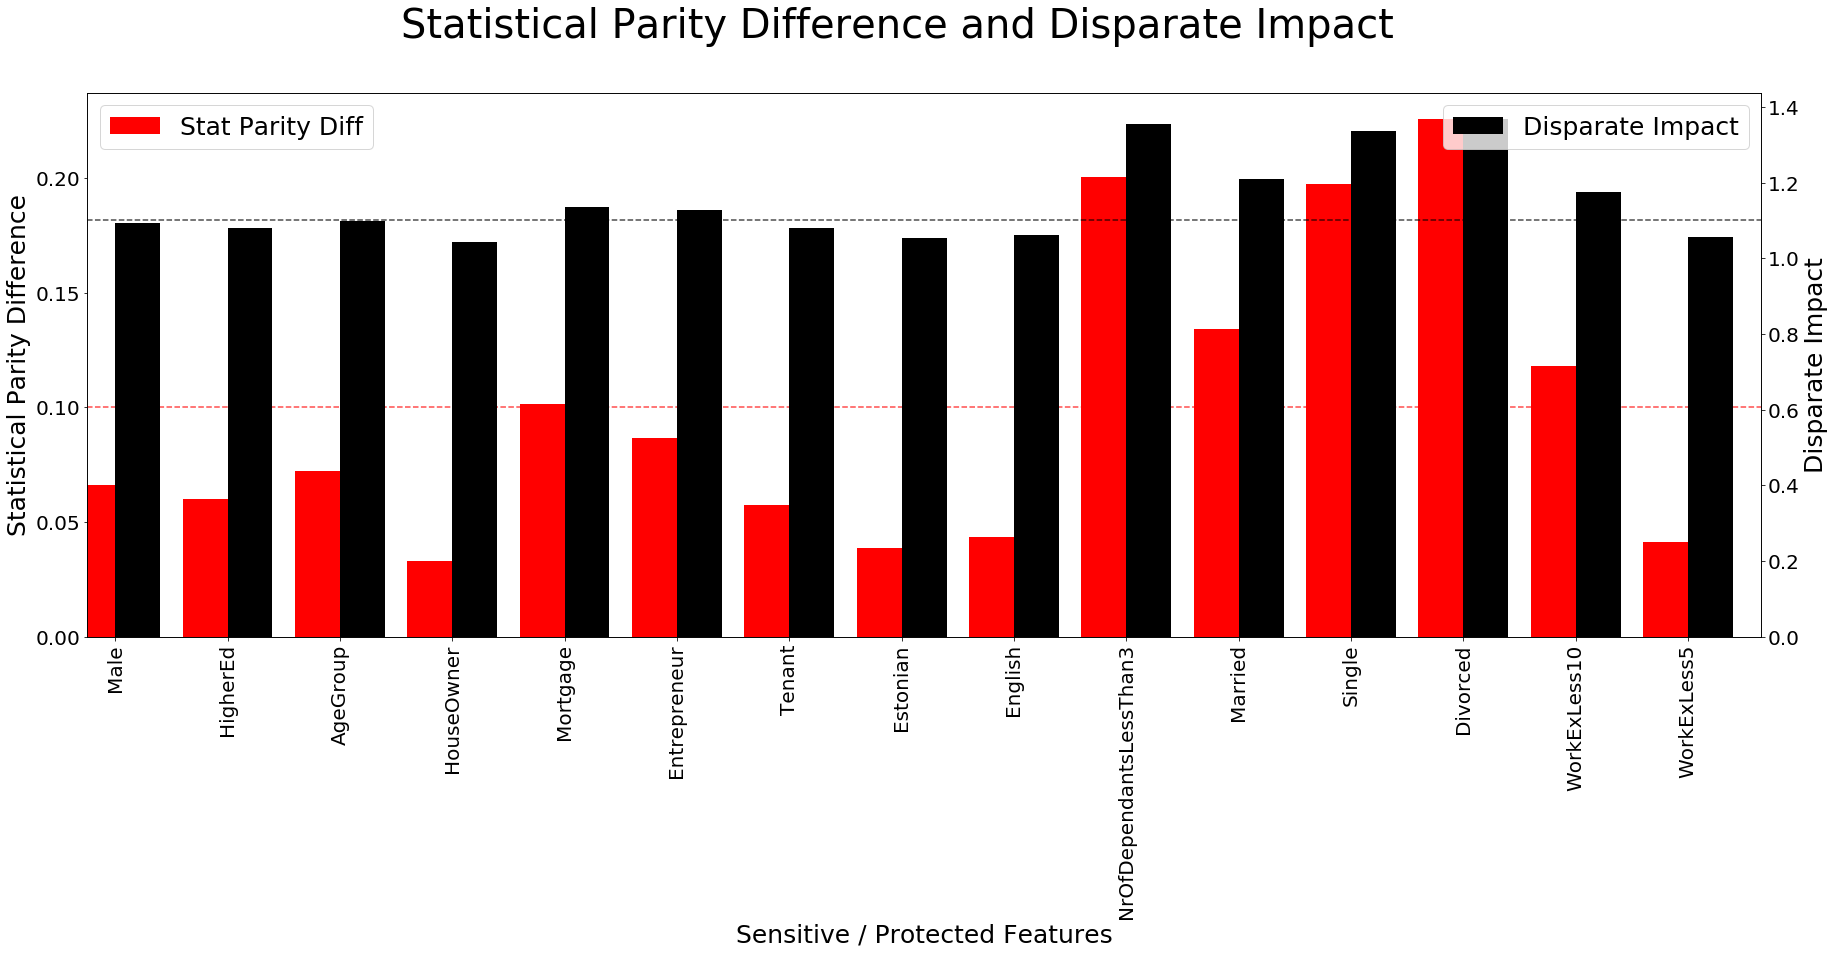

In [14]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.


fig.suptitle('Statistical Parity Difference and Disparate Impact', fontsize=40, y=1)


width = 0.4
d.plot(x ='Protected_feature', y='SP_normal', kind = 'bar', ax=ax, width=width, 
       position=1, color='red', legend=False, figsize=(30,10), fontsize=20)

d.plot(x ='Protected_feature', y='DI_normal', kind = 'bar', ax=ax2, width=width, 
       position=0, color='black', legend=False, figsize=(30,10), fontsize=20)

ax.axhline(y=0.1, linestyle='dashed', alpha=0.7, color='red')
ax2.axhline(y=1.10, linestyle='dashed', alpha=0.7, color='black')


patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, ['Stat Parity Diff'], loc='upper left', fontsize=25)

patches, labels = ax2.get_legend_handles_labels()
ax2.legend(patches, ['Disparate Impact'], loc='upper right', fontsize=25)



labels = [item.get_text() for item in ax.get_xticklabels()]

labels[0] = 'Male'
labels[1] = 'HigherEd'
labels[2] = 'AgeGroup'
labels[3] = 'HouseOwner'
labels[4] = 'Mortgage'
labels[5] = 'Entrepreneur'
labels[6] = 'Tenant'
labels[7] = 'Estonian'
labels[8] = 'English'
labels[9] = 'NrOfDependantsLessThan3'
labels[10] = 'Married'
labels[11] = 'Single'
labels[12] = 'Divorced'
labels[13] = 'WorkExLess10'
labels[14] = 'WorkExLess5'

ax.set_xticklabels(labels)


#ax2.axhline(y=.80, linestyle='dashed', alpha=0.7, color='black')

ax.set_xlabel('Sensitive / Protected Features', fontsize=25)

ax.set_ylabel('Statistical Parity Difference', fontsize=25)
ax2.set_ylabel('Disparate Impact', fontsize=25)

plt.show()

#fig.savefig('SPDnDI.svg', format='svg', dpi=500, bbox_inches='tight')
#fig.savefig('SPDnDI.png', format='png', dpi=500, bbox_inches='tight')
#beingsaved = plt.figure()
#beingsaved.savefig('SPDnDI.eps', format='eps', dpi=500)




<div class="alert alert-block alert-success">
<b>Inference:</b>
It's clearly visible that 5 sensitive features (NrOfDependantslessthan3, Married, Single, Divorced and WorkExLess10) are having bias as per Statistical Parity Difference and Disparate Impact
</div>

### Frequency for sensitive features

In [15]:
for groupe in range(0, len(protected_attribute_names)):
    protected_attribute_name = list(privileged_groups[groupe].keys())[0]
    #print(protected_attribute_name)
    #print(data[protected_attribute_name].value_counts())
    #print ("-------------------------------------")

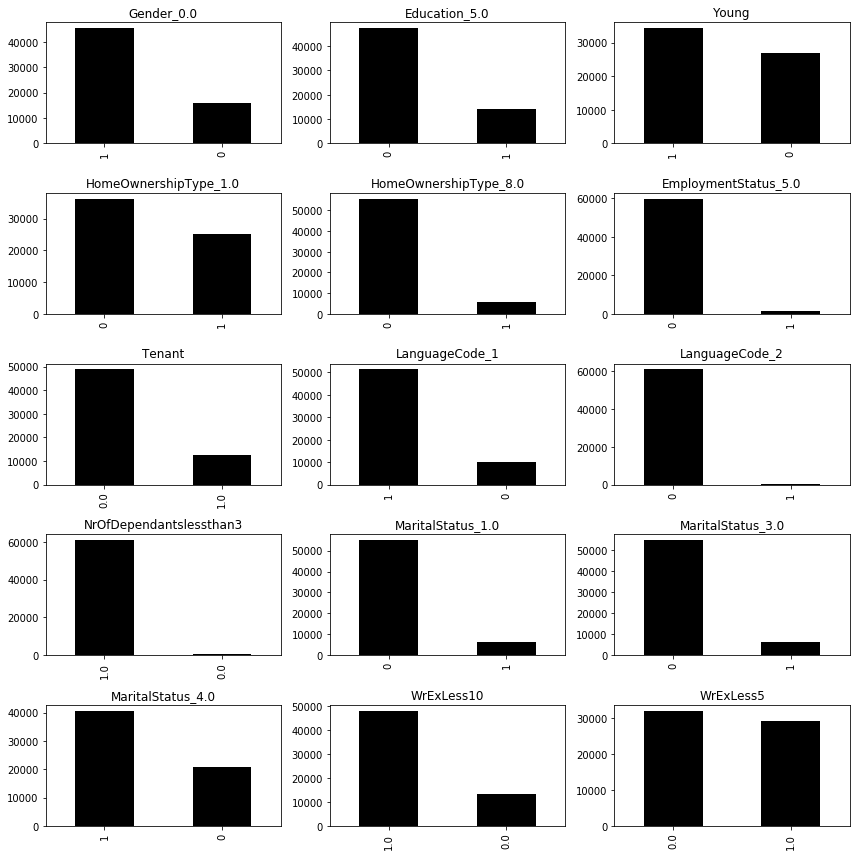

In [16]:
fig = plt.figure()

#ax = sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5)
#ax.set_title("Frequency of each sensitive features", fontsize=15) # fontweight="bold"



for groupe in range(0, len(protected_attribute_names)):
    #plt.figure(figsize = (4,2))
    protected_attribute_name = list(privileged_groups[groupe].keys())[0]
    #data[protected_attribute_name].value_counts().plot(kind='bar')
    ax = fig.add_subplot(5,3,groupe+1)

    
    vc=data[protected_attribute_name].value_counts()
    ax=vc.plot(kind='bar', figsize=(12,12), title=protected_attribute_name, color = 'black')
    #axes.plot(vc)


plt.tight_layout()
plt.show()

### Cross-tabs for sensitive features

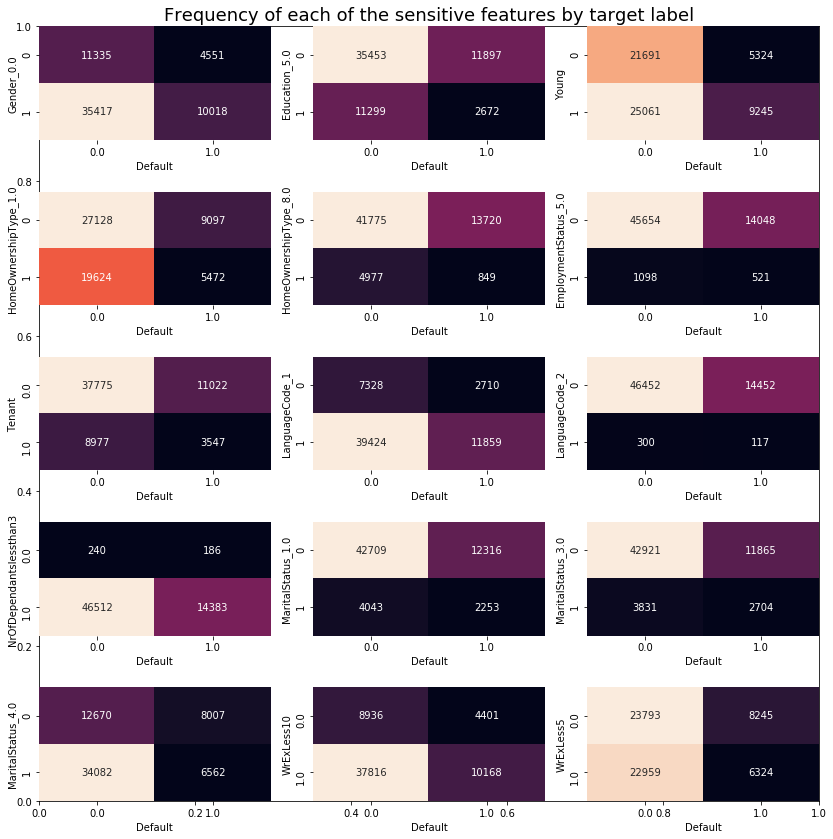

In [17]:
#fig = plt.figure()
fig, ax = plt.subplots(figsize=(12,12))
#plt.suptitle('lalala')
ax.set_title("Frequency of each of the sensitive features by target label", fontsize=18)


for groupe in range(0, len(protected_attribute_names)):
    #_,ax = plt.figure(figsize = (8,8))
    protected_attribute_name = list(privileged_groups[groupe].keys())[0]
    #data[protected_attribute_name].value_counts().plot(kind='bar')
    ax = fig.add_subplot(5,3,groupe+1)

    plotdf=pd.crosstab(data[protected_attribute_name], data['Default'])
    ax=sns.heatmap(plotdf, annot=True, fmt='g', cbar=False, ax=ax)    #axes.plot(vc)
    #print (type(axes))


plt.tight_layout()
plt.show()

### Calculation for Statistical Parity and Disparate Impact for a given protected feature
**Declaring the protected feature (a.k.a sensitive feature) and privileged & unprivileged groups**  
Here we are trying to find bias on basis of a sensitive feature (that explains if the customer is Married or Otherwise)

In [18]:
choice = 'MaritalStatus_1.0'
pval = 0 #privileged : see the above heatmaps
upval = int(not pval) #Unprivileged
#['HomeOwnershipType_8.0', 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0', 'WrExLess10']

In [19]:
label_names=['Default']
protected_attribute_names=[choice]
privileged_groups=[{choice: pval}]
unprivileged_groups=[{choice: upval }]

input_dataframe = data
INPUT_DATAFRAME = input_dataframe

LABEL_NAMES = label_names
PROTECTED_ATTRIBUTE_NAMES = protected_attribute_names
PRIVILEGED_GROUPS = privileged_groups
UNPRIVILEGED_GROUP = unprivileged_groups

**Extracting the key and value from declared dictionary**

In [21]:
protected_attribute_name = list(UNPRIVILEGED_GROUP[0].keys())[0]
privileged_group_protected_attribute_value = PRIVILEGED_GROUPS[0][protected_attribute_name]
unprivileged_group_protected_attribute_value = UNPRIVILEGED_GROUP[0][protected_attribute_name]

**Calculating Statistical Parity and Disparate Impact scores**

In [22]:
stat_parity, disprate_impact = stat_parity_test(data, protected_attribute_name, 'Default', fav,
              privileged_group_protected_attribute_value, unprivileged_group_protected_attribute_value)


Statistical Parity Difference -0.1340207177400593
Disparate Impact 0.8273317100927963


<div class="alert alert-block alert-success">
<b>Inference:</b> 
The Statistical Parity Difference for sensitive feature Married is more than -0.10 and Disparate Impact is less than 0.90, thus there can be traces fo bias in the data. This needs further investigation. Furthermore, the negative sign shows that the unprivileged group is worse in favourable outcome that privileged class (as the formula used it probablity of unprivileged - probability of privileged)
</div>

<div class="alert alert-block alert-info">
<b>Remember:</b> 

- Statistical Parity Difference should be between -0.1 and 0.1
- Disparate Impact should be between 0.90 and 1.10
</div>




<span style="float:right;"> [TOC](#TOC) </span>

---

<a id="5"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Removing bias from data using reweighing technique</span>
</div>

In order to remove or reduce discrimination and reduce the difference between statistical parity difference (SPD) and disparate impact (DI) techniques like reweighing is recommended. It is one of those techniques that not only reduces discrimination by few notches but has no trade-off on accuracy of the model. Here the SPD for one protected feature 'Married' is 0.13 which means that the probability of getting a favourable outcome for privileged group is 13 points more than the unpriviliged group.

The dataset $\mathbf{D}_{ij}$ = $\mathbf{X_i, S_i, Y_i}$ are assigned weights using the reweighing  techniques. By carefully choosing the weights, the dataset $\mathbf{D}$ can be made discrimination-free w.r.t. $\mathbf{S}$ without having to change any of the labels.

[**Reweighing**](https://link.springer.com/content/pdf/10.1007%2Fs10115-011-0463-8.pdf)

The tuples in the training dataset are assigned weights. By carefully choosing the weights, the training dataset can be made discrimination-free w.r.t. ${S}$ without having to change any of the labels. The weights on the tuples can be used directly. 

*Note: Basic t-test that will reveal bias is the two-sample t test*

**Discrimination:** 

$$
\begin{align}
\frac{(X_{S}=advantageous | X_{Class}=positive)}{X_{S}=advantageous} - \frac{(X_{S}= disadvantageous | X_{Class}=positive)}{X_{S}= disadvantageous}
\end{align}
$$


**Weight:**
$$
\begin{align}
\frac{P_{expected}(S=X_{S} \ and \ Class=X_{Class})}{P_{observed}(S=X_{S} \ and \ Class=X_{Class})}
\end{align}
$$

Thus, there will be four categories of weights when:


- $X_{S}$ = advantageous, $X_{Class}$ = positive [Privileged and favourable]
- $X_{S}$ = advantageous, $X_{Class}$ = negative [Privileged and unfavourable]
- $X_{S}$ = disadvantageous, $X_{Class}$ = positive [Unprivileged and favourable]
- $X_{S}$ = disadvantageous, $X_{Class}$ = negative [Unprivileged and unfavourable]

<div class="alert alert-block alert-info">
<b>Remember:</b> 
Reweighing is one of those methods that has zero or less trade-off on accurcay of the algorithm. It can be also used for multi-class target variable and multi-level sensitive feature. Furthermore, it can be used for all types of supervised learning algorithms
</div>

In [23]:
PRIVILEGED_GROUPS
UNPRIVILEGED_GROUP

instance_weight = np.repeat(1, len(data)) 
data['instance_weights']=instance_weight

In [24]:
n = np.sum(data['instance_weights']) #Total number of instances
n_p = np.sum(data['instance_weights'][data[choice]==pval]) #Total number of privileged
n_up = np.sum(data['instance_weights'][data[choice]==upval]) #Total number of unprivileged
n_fav = np.sum(data['instance_weights'][data['Default']==0]) #Total number of favourable
n_unfav = np.sum(data['instance_weights'][data['Default']==1]) #Total number of unfavourable
n_p_fav=data[(data[choice]==pval)&(data['Default']==0)] 
n_p_unfav=data[(data[choice]==pval)&(data['Default']==1)] 
n_up_fav=data[(data[choice]==upval)&(data['Default']==0)] 
n_up_unfav=data[(data[choice]==upval)&(data['Default']==1)] 

w_n_p_fav = np.sum(n_p_fav['instance_weights']) #Total number of privileged and favourable
w_n_p_unfav = np.sum(n_p_unfav['instance_weights']) #Total number of privileged and unfavourable
w_n_up_fav = np.sum(n_up_fav['instance_weights']) #Total number of unprivileged and favourable
w_n_up_unfav = np.sum(n_up_unfav['instance_weights']) #Total number of unprivileged and unfavourable

In [25]:
w_n_p_fav, w_n_p_unfav, w_n_up_fav, w_n_up_unfav #No of instances per combination


**Calculating weights**

**For instance:**
$$
\begin{align}
Weight_{P+F} = \frac{\mathbb{P}(Expected_{P+F})}{ \mathbb{P}(Observed_{P+F})}\\ \\
\mathbb{P}_{Expected} = \frac{Favourable}{n} * \frac{Privileged}{n} \\ \\
\mathbb{P}_{Observed} = \frac{Privileged \ and \ Favourable}{n}\\ \\
Weight_{P+F} = \frac{\frac{Favourable * Privileged} {n^2}}{ \frac{Privileged \ and \ Favourable}{n}}\\ \\
Weight_{P+F} = \frac{Favourable * Privileged} {Privileged \ and \ Favourable * n}\\ \\
\end{align}
$$


In [29]:
w_p_fav = (n_fav*n_p) / (n*w_n_p_fav)
w_p_unfav = (n_unfav*n_p) / (n*w_n_p_unfav)
w_up_fav = (n_fav*n_up) / (n*w_n_up_fav)
w_up_unfav = (n_unfav*n_up) / (n*w_n_up_unfav)

w_p_fav, w_p_unfav, w_up_fav, w_up_unfav

(0.9822716597371903, 1.061477726882457, 1.1872766965828196, 0.6639326745298092)

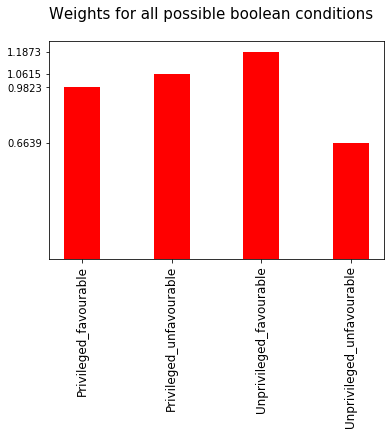

In [30]:
top=[('Privileged_favourable',w_p_fav),('Privileged_unfavourable',w_p_unfav),('Unprivileged_favourable',w_up_fav), ('Unprivileged_unfavourable',w_up_unfav)]

labels, ys = zip(*top)
xs = np.arange(len(labels)) 
width = .4

plt.suptitle('Weights for all possible boolean conditions', fontsize=15, y=1)

plt.bar(xs, ys, width, color='red')

plt.xticks(xs, labels, rotation=90, fontsize=12) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys, fontsize=10)


plt.show()


**Bias before and after reweighing**

In [31]:
DiscriminationBefore=(w_n_p_fav/n_p)-(w_n_up_fav/n_up)
DiscriminationAfter=(w_n_p_fav/n_p *w_p_fav)-(w_n_up_fav/n_up *w_up_fav )


DiscriminationBefore, DiscriminationAfter

(0.1340207177400593, 1.1102230246251565e-16)

**Adding a new column 'NewWeights' with weights calculated above**

In [32]:
datatest=data
datatest['NewWeights']= np.repeat(999, len(datatest)) 
datatest.loc[(datatest[choice]==pval) & (datatest['Default']==0), 'NewWeights'] = w_p_fav
datatest.loc[(datatest[choice]==pval) & (datatest['Default']==1), 'NewWeights'] = w_p_unfav
datatest.loc[(datatest[choice]==upval) & (datatest['Default']==0), 'NewWeights'] = w_up_fav
datatest.loc[(datatest[choice]==upval) & (datatest['Default']==1), 'NewWeights'] = w_up_unfav

**Frequency of each weight**

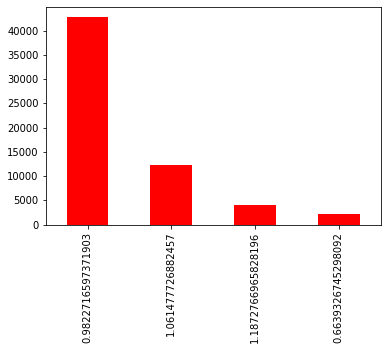

In [33]:
fig, ax = plt.subplots()
datatest['NewWeights'].value_counts().plot(ax=ax, kind='bar', color='red')
plt.show()

Thus, there four categories of weights are generated from the above stated method, each of the weights corresponding to the combination of protected feature (${\mathbf{S_a},\mathbf{S_d}}$) and labelled feature ($\mathbf{Y^+}, \mathbf{Y^-}$).

The calculation of the weights is primarily based on ratio of expected probability of having favourable outcome to that of actual probability in the data. In this context and to illustrate the maths behind the algorithm, the protected feature $\mathbf{S}$ is defined to be the binary feature that indicates an individual's Married status as 0 or 1. The definition of $\mathbf{S_a, S_d, Y^+, Y^-} $ can be easily defined using a heatmap

The weights here are reflection of disproportion representation of the protected class with respect to positive outcome in the data.

After calculating the weights for all the four combinations of the protected feature ($\mathbf{S_a, S_d}$) and the labelled feature ($\mathbf{Y^+, Y^-}$), it was seen that the representation of the unprivileged with the unfavourable outcome is least and its weight as per the reweighing algorithm is 0.663 and the highest weight is for the instances with combination of favourable and unprivileged, which is what was the objective. Using the formula described earlier, the discrimination without using the weights stood at 0.1340 while discrimination after using weights was 1.1102e-16 (almost zero). 
This brings the discrimination in the data based on one protected class to zero. However, removing bias from data is a half-backed solution. 

The weights thus can be used as sample weights for most of the commonly used ML algorithms. These weights would penalise the cost function for any error with weights specified. In simple words, the algorithm won’t give equal weights for all errors it makes, but would have weighted errors thus penalising maximum for the unprivileged / disadvantageous ($\mathbf{S_d}$) and the favourable ($\mathbf{Y^+}$) combination.

 

<div class="alert alert-block alert-success">
<b>Inference:</b>
The representation of unprivileged customers with unfavourable outcome is least and its weight as per reweighing algorithm is 0.663. Note the highest weight is for the instances with combination of favourable and unprivileged
</div>

<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="5a"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:1.25em;">Model development with and without weights</span>
</div>

**Missing value impuation for modelling**

In [34]:
datatest['MonthlyPayment'].fillna((datatest['MonthlyPayment'].mean()), inplace=True)
datatest['ExpectedLoss'].fillna((datatest['ExpectedLoss'].mean()), inplace=True)
datatest['ProbabilityOfDefault'].fillna((datatest['ProbabilityOfDefault'].mean()), inplace=True)
datatest['DebtToIncome'].fillna((datatest['DebtToIncome'].mean()), inplace=True)
datatest['FreeCash'].fillna((datatest['FreeCash'].mean()), inplace=True)
datatest['LossGivenDefault'].fillna(0, inplace=True)

#### Some classification definitions 
<img style="float: left; width: 500px; padding-right: 15px;" src="confusionMatrxiUpdated.jpg">  

<div class="alert alert-block alert-info">
<b>Remember:</b> 

<i>If we have a generic learning algorithm, increasing the sample weight should increase the effect of 
training on the sample.   
e.g. if we have a batched loss, instead of a sum over the batch we would do a weighted sum so higher weighted 
samples dominate the loss.  
In most cases, it is as simple as weighing the loss function, such that more important (or perhaps rarer) observations contribute more strongly to the loss and vice-versa</i>
</div>

In this use case, the weights calculated above for the binary protected feature ($\mathbf{S}$) Married (with a statistical parity difference being -0.1340 and a disparate impact being 0.8273) was used as sample weight for a logistic regression with $\mathbf{Y}$ being binary feature for Default and all other features as-is. In the first model ($M_{full}$) all variables were included without any sample weights while for the second model ($M_{rw}$) the sample weights as calculated above were included as a model parameter.

In [35]:
target=['Default']
x=datatest.drop(columns=['Age', 'instance_weights','Default'])
y=datatest['Default']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=6666)

In [38]:
X_train_weights=X_train['NewWeights']
X_test_weights=X_test['NewWeights']

X_train1=X_train.drop(columns=["NewWeights"])
X_test1=X_test.drop(columns=["NewWeights"])


**Model without weights**

In [39]:
clf_wow = LogisticRegression(random_state=0, solver='lbfgs',
                              multi_class='ovr').fit(X_train1, y_train)


In [40]:
y_pred_wow=clf_wow.predict(X_test1)
y_pred_prob_wow=clf_wow.predict_proba(X_test1)[:,0]

**Total accuracy of the model**

In [41]:
print("Accuracy of the model without weights:", clf_wow.score(X_test1, y_test))

Accuracy of the model without weights: 0.7583301625264989


**Accuracy difference between privileged and unprivileged group**

In [42]:
A_wow=clf_wow.score(X_test1[X_test1[choice]==0], y_test[X_test1[choice]==0]) #pval = 0 is Priviliged
B_wow=clf_wow.score(X_test1[X_test1[choice]==1], y_test[X_test1[choice]==1]) #pval = 1 is Unpriviliged
print("Accuracy difference between two groups:", abs(B_wow-A_wow)*100, "%")

Accuracy difference between two groups: 13.862120361055453 %


**Model with weights**

<div class="alert alert-block alert-info">
<b>Remember:</b> Pass your sample weights obtained from reweighing as sample weights to training model.     

<i>If we have a generic learning algorithm, increasing the sample weight should increase the effect of 
training on the sample.   
e.g. if we have a batched loss, instead of a sum over the batch we would do a weighted sum so higher weighted 
samples dominate the loss.  
In most cases, it is as simple as weighing the loss function, such that more important (or perhaps rarer) observations contribute more strongly to the loss and vice-versa</i>
</div>

In [43]:
clf_ww = LogisticRegression(random_state=0, solver='lbfgs',
                              multi_class='ovr').fit(X_train1, y_train, sample_weight=X_train_weights)


In [44]:
y_pred_ww = clf_ww.predict(X_test1)
y_pred_prob_ww = clf_ww.predict_proba(X_test1)[:,0]

**Total accuracy of the model with weights**

In [45]:
print("Accuracy of the model with weights:", clf_ww.score(X_test1, y_test))

Accuracy of the model with weights: 0.7592542262325379


**Accuracy difference between privileged and unprivileged group (model with weights)**

In [46]:
A_ww=clf_ww.score(X_test1[X_test1[choice]==0], y_test[X_test1[choice]==0])
B_ww=clf_ww.score(X_test1[X_test1[choice]==1], y_test[X_test1[choice]==1])
print("Accuracy difference between two groups:", abs(B_ww-A_ww)*100, "%" )

Accuracy difference between two groups: 13.377956802780954 %


**Summary of model performace**

Metrics  | Without Weights | With Weights | Delta |
------------- | ------------- | ------------ |-------|
Overall Accuracy  | 0.7583 |0.7592| 0.0009|
Accuracy Difference  | 13.8621|13.3779|0.4841|

<div class="alert alert-block alert-success">
<b>Inference:</b>
The overall accuracy of models with weights (weights generated by reweighing algorithm) has improved by few points while the overall accuracy difference between privileged group and unprivileged group has become narrower. A win-win situation
</div>

### Various other accuracy metrics before and after reweighing

In [47]:
model_perf=[model_metrics(y_test, y_pred_prob_ww, y_pred_prob_wow, 
                          y_pred_ww, y_pred_wow, X_test1)]

headers=["AUC", "Gini", "Avg Precision Score", "Precision", "Sensitivity", "False Negative Rate", 
         "F1 Score", "Total Cost"]


#full_metric={'With Weights':B, 
#             'Without_Weights':list(ww[0]), 'Without_Weights':list(wow[0])}

#compare_table=pd.DataFrame.from_dict(ww_wow)

B = list(model_perf[0])[:len(list(model_perf[0]))//2]
C = list(model_perf[0])[len(list(model_perf[0]))//2:]


model_table={'Metrics':headers, 
             'With_Weights':B, 'Without_Weights':C}

model_table_df=pd.DataFrame.from_dict(model_table)
model_table_df.loc[8] = ['Total Cost (in Mn)', model_table_df.iloc[7,1]/10000000, model_table_df.iloc[7,2]/10000000]
#model_table_df

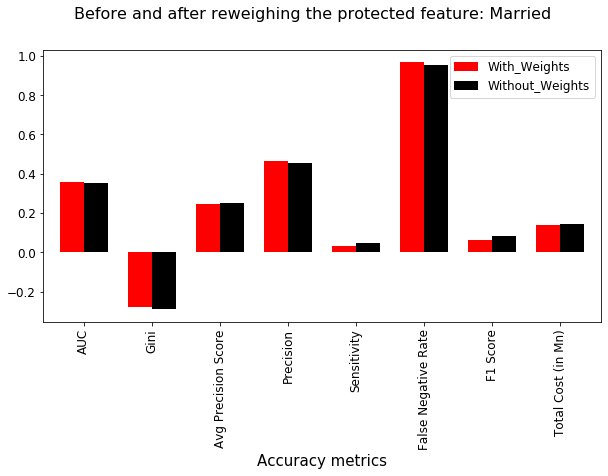

In [48]:
#plt.clf()
#plt.figure()

labeltext='Married'


ax = model_table_df.iloc[[0,1,2,3,4,5,6,8],:].plot.bar(x='Metrics', rot=90, width = 0.7, 
                                                       color=['red', 'black'], figsize=(10,5), fontsize=12)
plt.suptitle('Before and after reweighing the protected feature: {}'.format(labeltext),  fontsize=16, y=1)



patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper right', fontsize=12)

ax.set_xlabel('Accuracy metrics', fontsize=15)


#plt.savefig('BnAR.svg', format='svg', dpi=500, bbox_inches='tight') #,
#plt.savefig('BnAR.png', format='png', dpi=500, bbox_inches='tight')
#beingsaved = plt.figure()
#beingsaved.savefig('BnAR.eps', format='eps', dpi=500)

plt.show()

<div class="alert alert-block alert-success">
<b>Inference:</b>
In order to remove the first issue as stated above, values of all accuracy metrics were calculated. The metrics like  AUC and precision, saw a positive change. Interestingly, what is observed is that the total cost of the model has decreased slightly.     
    
After using weights (generated from reweighing algorithm) metrics like AUC, precision, false negative rate has increased while gini, sensitivity, F1 score and cost has decreased significantly.
    
<b> PS: Cost here is 700 for each FP and 300 for each FN</b>
</div>

<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="5b"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:1.25em;">Fairness metrics post model training</span>
</div>

[Fairness definitions explained](http://fairware.cs.umass.edu/papers/Verma.pdf)

**Average Odds ratio**: average of difference in FPR and TPR for unprivileged and privileged groups

$$
\begin{array}
½ [(FPR_{S=unprivileged}−FPR_{S=privileged}) + (TPR_{S=privileged}−TPR_{S=unprivileged}))]
\end{array}
$$

**Equal Opportunity** (for false negative rate): both protected and unprotected groups have equal FNR
    
$$
\begin{array}
\mathbb{P}( \hat{Y} = 0 \mid {Y} = 1,\mathbf{S} = \mathbf{T}_{a}) =\mathbb{P} ( \hat{Y} = 0 \mid {Y} = 1, \mathbf{S} = \mathbf{T}_{d} )
\end{array}
$$

**Predictive Equality** (for false positive rate): both protected and unprotected groups have equal FPR
$$
\begin{array}
\mathbb{P} ( Y= 1   \mid \hat{Y} = 0,\mathbf{S} = \mathbf{T}_{a}) = \mathbb{P} (Y = 1 \mid \hat{Y} = 0, \mathbf{S} = \mathbf{T}_{d} )
\end{array}
$$

**Equalised Odds**: equal TPR and FPR
$$
\begin{array}
\mathbb{P}( \hat{Y} = 1 \mid {Y} = i,\mathbf{S} = \mathbf{T}_{a}) = \mathbb{P} (\hat{Y} = 1 \mid {Y} = i, \mathbf{S} = \mathbf{T}_{d} ), i ∈ 0, 1
\end{array}
$$

**Treatment Equality**: equal ratio of false negatives and false positives
$$
\begin{array}
 (FN / FP)_{\mathbf{S} = \mathbf{T}_{a}} = (FN / FP)_{\mathbf{S}=\mathbf{T}_{d}}
\end{array}
$$

**Predictive Parity**: both protected and unprotected groups have equal PPV
$$
\begin{array}
\mathbb{P} ( Y= 1 \mid \hat{Y} = 1,\mathbf{S} = \mathbf{T}_{a}) = \mathbb{P} (Y = 1  \mid \hat{Y} = 1, \mathbf{S} = \mathbf{T}_{d} )
\end{array}
$$

**Demographic Parity**: membership in a protected class should have no correlation with the decision
$$
\begin{array}
\mathbb{P} ( \hat{Y} = 1 \mid  \mathbf{S} = \mathbf{T}_{a}) = \mathbb{P} (\hat{Y} = 1 \mid \mathbf{S} = \mathbf{T}_{d} )
\end{array}
$$

In [49]:
ww=[perf_metrics(y_test, y_pred_prob_ww, y_pred_ww, X_test1, choice, pval, upval)]
wow=[perf_metrics(y_test, y_pred_prob_wow, y_pred_wow, X_test1, choice, pval, upval)]
headers=["Area Under Curve", "Avg Precision Score", "Eq of Opportunity", "Eq Of Odds", "Precision", 
         "Demographic Parity", "Avg Odds Diff", "Predictive Equality", "Treatment Equality", "Predictive Parity",
         "Cost Diff", "Total Cost"]

In [50]:
ww_wow={'Metrics':headers, 
             'With_Weights':list(ww[0]), 'Without_Weights':list(wow[0])}

compare_table=pd.DataFrame.from_dict(ww_wow)
compare_table.loc[12] = ['Total Cost (in Mn)', compare_table.iloc[11,1]/10000000, compare_table.iloc[11,2]/10000000]

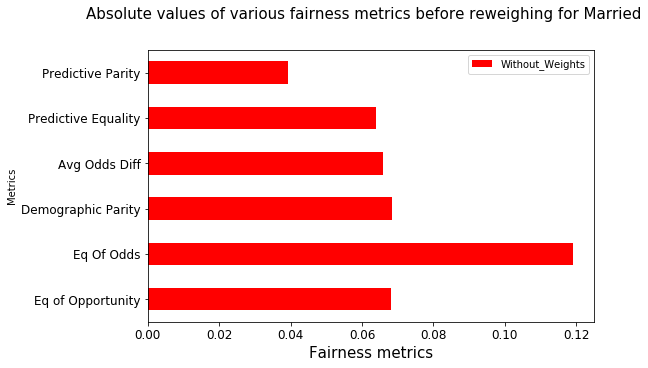

In [51]:
ax = compare_table.iloc[[2,3,5,6,7,9],[0,2]].plot.barh(x='Metrics', width = 0.5, color=['red', 'black'], 
                                                       figsize=(8,5), fontsize=12)
plt.suptitle('Absolute values of various fairness metrics before reweighing for {}'.format(labeltext),  
             fontsize=15, y=1)

#patches, labels = ax.get_legend_handles_labels()
#ax.legend(patches, labels, loc='upper right', fontsize=12)


ax.set_xlabel('Fairness metrics', fontsize=15)

plt.show()

#### Difference in metrics (accuracy and fairness) between two groups before and after

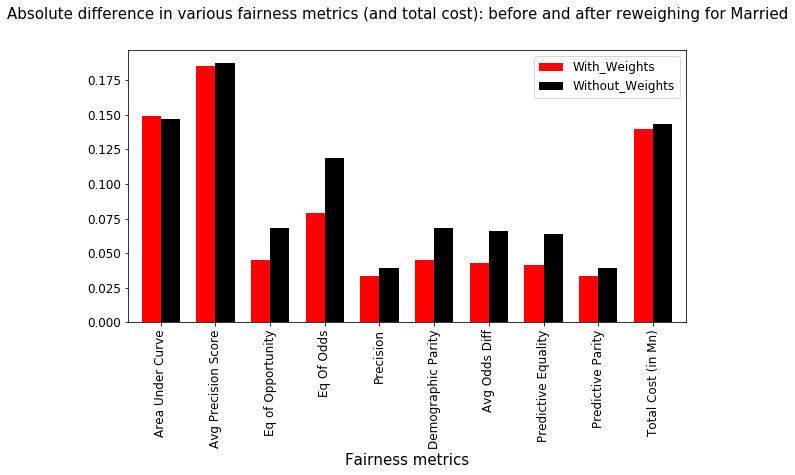

In [52]:
ax = compare_table.iloc[[0,1,2,3,4,5,6,7,9,12],:].plot.bar(x='Metrics', rot=90, width = 0.7, color=['red', 'black'], 
                                                           figsize=(10,5), fontsize=12)
plt.suptitle('Absolute difference in various fairness metrics (and total cost): before and after reweighing for {}'.format(labeltext),  
             fontsize=15, y=1)

#'f model: T= {}'.format(t)


patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper right', fontsize=12)


ax.set_xlabel('Fairness metrics', fontsize=15)


#plt.savefig('ADF.svg', format='svg', dpi=500, bbox_inches='tight')
#plt.savefig('ADF.png', format='png', dpi=500, bbox_inches='tight')

#beingsaved = plt.figure()
#beingsaved.savefig('ADF.eps', format='eps', dpi=500)


plt.show()

<div class="alert alert-block alert-success">
<b>Inference:</b> In the usecase in question, the focus should be on the fairness definition that focusses on TP and FP (as these two values would impact the bottom line heavily). Thus, predictive equality and equalised odds should be considered the primary fairness metrics while average odds ratio and predictive parity as secondary fairness metrics.


Its observed that, in terms of delta, equalised odds has shown maximum improvement (from 1.19e-01 to 7.91e-02). The difference in predictive equality initially was 6.38e-02 between two groups of the protected attribute and has now reduced to 4.11e-02 inferring that the FPR (FP/N) is similar for both groups. In simple words, the disparity in the loss impact of the model by both the groups has reduced significantly while earlier the loss impact by one group was much higher than the others.

Not only loss impact, but the disparity of TP (revenue impact) has decreased as predictive parity that measures PPV (TP / TP+FP) is now 3.33e-02 compared to 3.93e-02 before introducing fairness parameter to the model. The cost reached a number of £0.14Mn.
    
    
It can be seen that by using weights (as generated by reweighing technique) almost all fairness metrics are performing better than in the case of model without weights.    
Equality of opportunity, predictive parity and predictive equality has the best result as it has improved drastically. In terms of delta, equality of odds has shown maximum improvement
</div>

<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="6"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Accuracy-cost-fairness trade-off</span>
</div>

Given the fact that any classification algorithm returns prediction probabilities for a class to be either 0 or 1, the decision threshold can be optimised.

In [53]:
thresholds = np.arange(0, 1.01, 0.01)

In [54]:
#Higher probablity is 0 in binary
#Lower probablity is 1 in binary

In [55]:
EOpp, EOdds, demo_parity, AOD, p_eq, TE, pp, TNR, precision, FPR, f1, roc, sensitivity, fnr, fp, fn, cost = on_same_threshold(X_test1, y_test, choice, y_pred_prob_wow, pval, upval)

In [56]:
#EOpp, EOdds, demo_parity, AOD, p_eq, TE, pp, TNR, precision, FPR, f1, roc, sensitivity, fnr, fp, fn, cost = on_same_threshold(X_test1, y_test, choice, y_pred_prob_ww, pval, upval)

In [57]:
cost = [x / 100000 for x in cost]

same_thresholds={'Threshold':thresholds, 
             'Eq of Opportunity':EOpp, 'Eq of Odds':EOdds, 'Demographic Parity': demo_parity,
                 'Avg Odds':AOD, 'Pred equality':p_eq, 'Treatment eq':TE, 'Pred Parity':pp,
                 'True Negative Rate': TNR, 'Precision': precision, 'False Positive Rate':FPR, 
                 "F1": f1, "Area Under Curve":roc , "Sensitivity":sensitivity, "False Negative Rate":fnr,
                 "FP":fp, "FN":fn,
                 'Cost':cost}

same_thresholds_table=pd.DataFrame.from_dict(same_thresholds)
same_thresholds_table = same_thresholds_table.fillna(0)
#same_thresholds_table.tail(10)

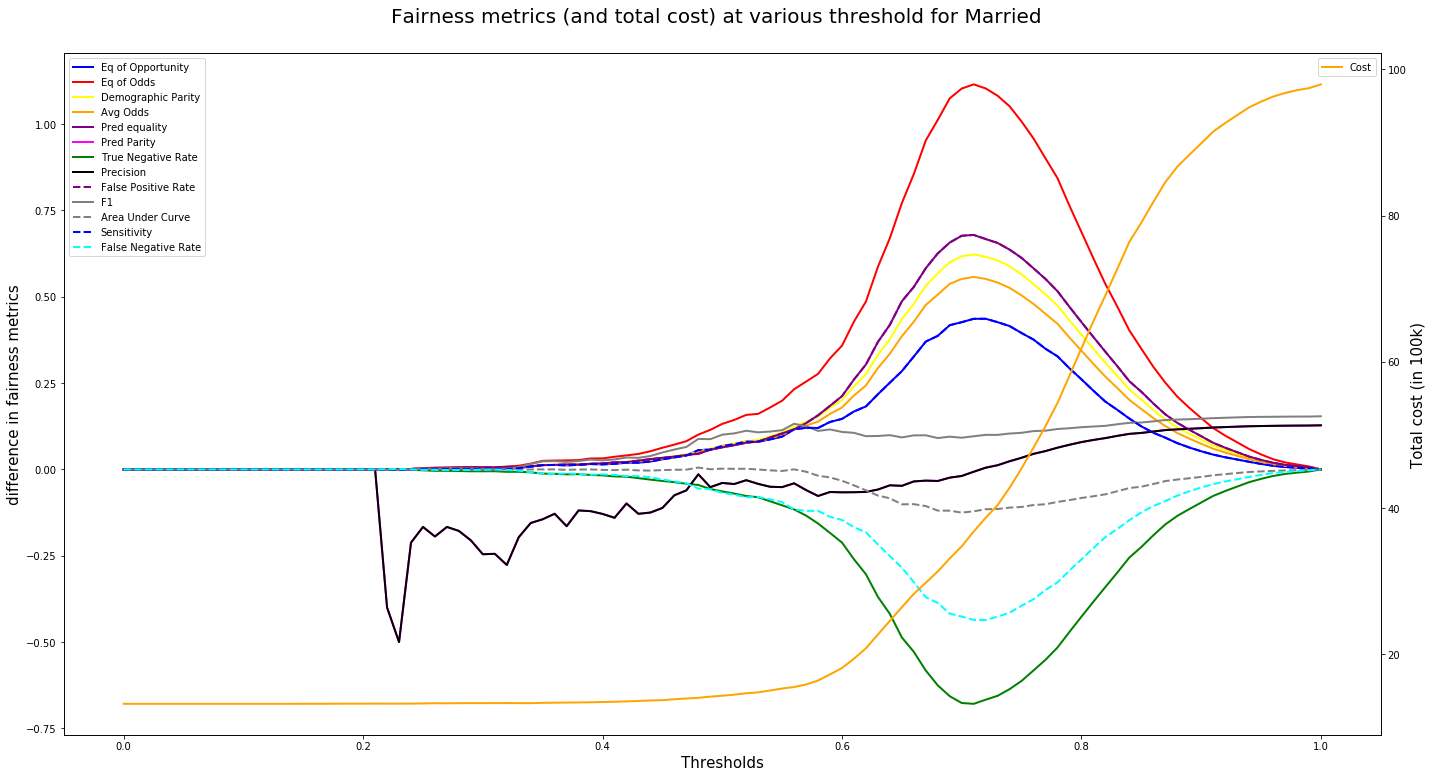

In [58]:
#plt.figure()

fig, ax1 = plt.subplots(figsize=(20,10))

fig.suptitle('Fairness metrics (and total cost) at various threshold for {}'.format(labeltext), fontsize=20, y=1.05)


ax1.plot( 'Threshold', 'Eq of Opportunity', data=same_thresholds_table, marker='', color='blue', linewidth=2)
ax1.plot( 'Threshold', 'Eq of Odds', data=same_thresholds_table, marker='', color='red', linewidth=2)
ax1.plot( 'Threshold', 'Demographic Parity', data=same_thresholds_table, marker='', color='yellow', linewidth=2)




ax1.plot( 'Threshold', 'Avg Odds', data=same_thresholds_table, marker='', color='orange', linewidth=2)
ax1.plot( 'Threshold', 'Pred equality', data=same_thresholds_table, marker='', color='purple', linewidth=2)
#ax1.plot( 'Threshold', 'Treatment eq', data=same_thresholds_table, marker='', color='yellow', linewidth=2)
ax1.plot( 'Threshold', 'Pred Parity', data=same_thresholds_table, marker='', color='magenta', linewidth=2)



ax1.plot( 'Threshold', 'True Negative Rate', data=same_thresholds_table, marker='', color='green', linewidth=2)
ax1.plot( 'Threshold', 'Precision', data=same_thresholds_table, marker='', color='black', linewidth=2)
ax1.plot( 'Threshold', 'False Positive Rate', data=same_thresholds_table, marker='', linestyle='--', color='purple', linewidth=2)
ax1.plot( 'Threshold', 'F1', data=same_thresholds_table, marker='', color='grey', linewidth=2)
ax1.plot( 'Threshold', 'Area Under Curve', data=same_thresholds_table, marker='', linestyle='--', color='grey', linewidth=2)
ax1.plot( 'Threshold', 'Sensitivity', data=same_thresholds_table, marker='', linestyle='--', color='blue', linewidth=2)
ax1.plot( 'Threshold', 'False Negative Rate', data=same_thresholds_table, marker='', linestyle='--', color='cyan', linewidth=2)



#ax1.plot( 'Threshold', 'FP', data=same_thresholds_table, marker='', color='black', linewidth=2)
#ax1.plot( 'Threshold', 'FN', data=same_thresholds_table, marker='', color='black', linewidth=2)





ax2 = ax1.twinx() 
ax2.plot( 'Threshold', 'Cost', data=same_thresholds_table, marker='', color='orange', linewidth=2)



patches, labels = ax1.get_legend_handles_labels()
ax1.legend(patches, labels, loc='upper left', fontsize=10)

patches, labels = ax2.get_legend_handles_labels()
ax2.legend(patches, labels, loc='upper left', fontsize=14)


ax1.set_ylabel('difference in fairness metrics', fontsize=15)
ax2.set_ylabel('Total cost (in 100k)', fontsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend()

ax1.set_xlabel('Thresholds', fontsize=15)


plt.show()
#plt.clf()

*Rather than accepting the default cut-off of 0.50 for deciding the class label to be 0 or 1, a custom decision threshold can be used. In the case of protected features (S) being married, its visible that the cost is minimum at lower threshold and increase significantly after 0.80. 
The fairness metrics has acceptable values everywhere except for thresholds between 0.50-0.80 while the accuracy difference between the two classes in minimum everywhere except for thresholds between 0.70-0.80. Thus, there seems a very distinct trade-off between fairness-cost-accuracy. 
However, the choice of threshold largely depend on fairness metric(s) under consideration, the sensitivity of the business problem and the appetite for the cost. 
In this case, it was decided to choose threshold of 0.42 to bring the cost to £0.13Mn and predictive parity to 6.8e-02. Compared to the default threshold the equalised odds was 3.01e-02 and predictive equality was 1.37e-02.*

<div class="alert alert-block alert-success">
<b>Inference:</b>
The cost is minimum at lower threshold and increase significantly after 0.80.         
The fairness metrics has acceptable values every where except for thresholds between 0.60-0.80.         
The accuracy difference between two classes in minimum everywhere except for thresholds between 0.60-0.80.
Thus, there seems a very distinct trade-off between fairness-cost-accuracy.    
In order to minimize cost, maximize accuracy and maintain fairness, the best range of threshold would be between 0.40-0.60 
</div>

<span style="float:right;"> [TOC](#TOC) </span>

---

<a id="8"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Additive counterfactual fair model</span>
</div>

The implementation of a [**linear counterfactually fair**](https://arxiv.org/pdf/1703.06856.pdf) model uses the each of the protected class variable ($\mathbf{S}$) to compute the residuals for each input variable ($\mathbf{X}$) and then calculate the residuals as a difference between actual and predicted values ($\mathbf{X}-\hat{X}$) which is then used to learn a function that maps from inputs to the target variable ($\mathbf{Y}$). 

ACF,within the framework of counterfactual fairness, is the idea that we model the correlations between  ${S}$  and features in  ${X}$  by training linear models to predict each feature  ${X_j}$  using  ${S}$  as input.

Then, we can compute the residuals  ${ϵ_{ij}}$  between predicted and true feature values for each observation  ${i}$  and feature  ${j}$ . The final model is then trained on  ${ϵ_{ij}}$  as features to predict  ${y}$


$$
\begin{array}{c}{X_{1}=\beta_{0}+\beta_{1} S_{1}+\beta_{2} S_{2}+\cdots+\beta_{n} S_{n}+\epsilon_{1}} \\ {X_{n}=\beta_{0}+\beta_{1} S_{1}+\beta_{2} S_{2}+\cdots+\beta_{n} S_{n}+\epsilon_{n}} \\ {\epsilon_{X1}={X_{1}}-\hat{X_{1}}\left(S_{1}, S_{2}, \ldots, S_{n}\right)} \\ {\epsilon_{Xn}={X_{n}}-\hat{X_{n}}\left(S_{1}, S_{2}, \ldots, S_{n}\right)} \\ {Y=\beta_{0}+\beta_{1} \epsilon_{X1}+\cdots+\beta_{n} \epsilon_{Xn}}\end{array}
$$


ACF allows a lot of flexibility, is model-agnostic and has a straight-forward implementation. It uses the baseline model (which can be any supervised learning model) and models on  top of the baseline model.

Here for comparison, two models were created one being a full logistic regression model ($M_{LR}$) and another a set of models for ACF. For the latter, 8 independent models were created with $\mathbf{Y}$ being the 8 independent variables and $\mathbf{X}$ being the 4 protected features. In the next steps, residuals (actual - predicted) for each of the 8 models were calculated ($\mathbf{Y}-\mathbf{\hat{Y}}$) as $\epsilon_1, \ldots, \epsilon_8$.
These 8 residuals were then fitted (logistic regression) as 
$X_{\epsilon_1}, \ldots, X_{\epsilon_8}$ on $\mathbf{Y_{default}}$. The above steps was used on training data and was evaluated using test data (20\%).

<a id="8a"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:1.25em;">Classification (multiple protected features)</span>
</div>

<div class="alert alert-block alert-info">
<b>Remember:</b>
    
- Here the target variable is:
 - Default
- The independent variables are:
 - Age
 - AppliedAmount
 - ExpectedLoss
 - LiabilitiesTotal
 - IncomeTotal
 - Interest
 - LoanDuration
 - MonthlyPayment
- The sensitive variables are:
 - NrOfDependantslessthan3
 - MaritalStatus_1.0
 - MaritalStatus_3.0
 - MaritalStatus_4.0
</div>

In [64]:
choice = 'MaritalStatus_3.0' #Single

In [65]:
dataacf = datatest[['Default','Age', 'AppliedAmount', 'ExpectedLoss', 'LiabilitiesTotal', 'IncomeTotal', 
                    'Interest', 'LoanDuration', 'MonthlyPayment',
"NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]

## Full model : Logistic Regression


In [66]:
y=dataacf['Default']
x=dataacf.drop(columns=['Default'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=6666)

In [67]:
clf_full = LogisticRegression(random_state=0, solver='liblinear',
                              multi_class='ovr').fit(X_train, y_train)


In [68]:
y_pred=clf_full.predict(X_test)
y_pred_prob=clf_full.predict_proba(X_test)[:,0]
print("Accuracy of the full model:", clf_full.score(X_test, y_test))

Accuracy of the full model: 0.7739910313901345


In [69]:
A_full=clf_full.score(X_test[X_test[choice]==0], y_test[X_test[choice]==0]) #pval = 0 is Priviliged
B_full=clf_full.score(X_test[X_test[choice]==1], y_test[X_test[choice]==1]) #pval = 1 is Unpriviliged
print("Accuracy difference between two groups:", abs(B_full-A_full)*100, "%")

Accuracy difference between two groups: 16.600874346801465 %


In [70]:
tn_up, fp_up, fn_up, tp_up = confusion_matrix(y_test[X_test[choice]==1], y_pred[X_test[choice]==1]).ravel()
tn_p, fp_p, fn_p, tp_p = confusion_matrix(y_test[X_test[choice]==0], y_pred[X_test[choice]==0]).ravel()
#y_true, y_pred

In [71]:
Fullmodel = acfmetrics(tn_up, fp_up, fn_up, tp_up, tn_p, fp_p, fn_p, tp_p)

## Additive counterfactual fair model

In [72]:
y=dataacf['Default']
x=dataacf.drop(columns=['Default'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=6666)

**Selecting few protected / sensitive features**

In [73]:
sens=X_train[["NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]

**Regressing each independent variable with sensitive variable**

In [74]:
clf_age = LinearRegression().fit(sens, X_train['Age'])
clf_AppliedAmount = LinearRegression().fit(sens, X_train['AppliedAmount'])
clf_ExpectedLoss = LinearRegression().fit(sens, X_train['ExpectedLoss'])
clf_LiabilitiesTotal = LinearRegression().fit(sens, X_train['LiabilitiesTotal'])
clf_IncomeTotal = LinearRegression().fit(sens, X_train['IncomeTotal'])
clf_Interest = LinearRegression().fit(sens, X_train['Interest'])
clf_LoanDuration = LinearRegression().fit(sens, X_train['LoanDuration'])
clf_MonthlyPayment = LinearRegression().fit(sens, X_train['MonthlyPayment'])

**Residual of each model**

In [75]:
ageR = X_train['Age'] - clf_age.predict(sens)
AppliedAmountR = X_train['AppliedAmount'] - clf_AppliedAmount.predict(sens)
ExpectedLossR = X_train['ExpectedLoss'] - clf_ExpectedLoss.predict(sens)
LiabilitiesTotalR = X_train['LiabilitiesTotal'] - clf_LiabilitiesTotal.predict(sens)
IncomeTotalR = X_train['IncomeTotal'] - clf_IncomeTotal.predict(sens)
InterestR = X_train['Interest'] - clf_Interest.predict(sens)
LoanDurationR = X_train['LoanDuration'] - clf_LoanDuration.predict(sens)
MonthlyPaymentR = X_train['MonthlyPayment'] - clf_MonthlyPayment.predict(sens)


In [76]:
df_R=pd.DataFrame({'ageR':ageR, 'AppliedAmountR':AppliedAmountR, 'ExpectedLossR':ExpectedLossR, 
                   'LiabilitiesTotalR':LiabilitiesTotalR,
                'IncomeTotalR':IncomeTotalR, 'InterestR':InterestR, 'LoanDurationR':LoanDurationR,
                   'MonthlyPaymentR':MonthlyPaymentR})

**Fitting residuals to the dependent (target) variable**

In [77]:
fair = LogisticRegression(random_state=0, solver='liblinear',
                              multi_class='ovr').fit(df_R, y_train)

**Regressing each independent variable with sensitive variable on test data**

In [78]:
sens=X_test[["NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]

In [79]:
clf_age = LinearRegression().fit(sens, X_test['Age'])
clf_AppliedAmount = LinearRegression().fit(sens, X_test['AppliedAmount'])
clf_ExpectedLoss = LinearRegression().fit(sens, X_test['ExpectedLoss'])
clf_LiabilitiesTotal = LinearRegression().fit(sens, X_test['LiabilitiesTotal'])
clf_IncomeTotal = LinearRegression().fit(sens, X_test['IncomeTotal'])
clf_Interest = LinearRegression().fit(sens, X_test['Interest'])
clf_LoanDuration = LinearRegression().fit(sens, X_test['LoanDuration'])
clf_MonthlyPayment = LinearRegression().fit(sens, X_test['MonthlyPayment'])

**Residual of each model on test data**

In [80]:
ageR = X_test['Age'] - clf_age.predict(sens)
AppliedAmountR = X_test['AppliedAmount'] - clf_AppliedAmount.predict(sens)
ExpectedLossR = X_test['ExpectedLoss'] - clf_ExpectedLoss.predict(sens)
LiabilitiesTotalR = X_test['LiabilitiesTotal'] - clf_LiabilitiesTotal.predict(sens)
IncomeTotalR = X_test['IncomeTotal'] - clf_IncomeTotal.predict(sens)
InterestR = X_test['Interest'] - clf_Interest.predict(sens)
LoanDurationR = X_test['LoanDuration'] - clf_LoanDuration.predict(sens)
MonthlyPaymentR = X_test['MonthlyPayment'] - clf_MonthlyPayment.predict(sens)


In [81]:
df_R_test=pd.DataFrame({'ageR':ageR, 'AppliedAmountR':AppliedAmountR, 'ExpectedLossR':ExpectedLossR, 
                        'LiabilitiesTotalR':LiabilitiesTotalR,
                'IncomeTotalR':IncomeTotalR, 'InterestR':InterestR, 'LoanDurationR':LoanDurationR,
                   'MonthlyPaymentR':MonthlyPaymentR})

**Predicting the target variable on fair model developed above**

In [82]:
pred_fair_te = fair.predict(df_R_test)

In [83]:
print("Accuracy of the ACF model:",fair.score(df_R_test, y_test))

Accuracy of the ACF model: 0.7668161434977578


In [84]:
A_fair=fair.score(df_R_test[sens[choice]==0], y_test[sens[choice]==0]) #pval = 0 is Priviliged
B_fair=fair.score(df_R_test[sens[choice]==1], y_test[sens[choice]==1]) #pval = 1 is Unpriviliged
print("Accuracy difference of the ACF model between two groups:", abs(B_fair-A_fair)*100, "%")

Accuracy difference of the ACF model between two groups: 19.649270808429243 %


In [85]:
tn_up, fp_up, fn_up, tp_up = confusion_matrix(y_test[sens[choice]==1], pred_fair_te[sens[choice]==1]).ravel()
tn_p, fp_p, fn_p, tp_p = confusion_matrix(y_test[sens[choice]==0], pred_fair_te[sens[choice]==0]).ravel()
#y_true, y_pred

In [86]:
ACFmodel = acfmetrics(tn_up, fp_up, fn_up, tp_up, tn_p, fp_p, fn_p, tp_p)

**Comparing full model with ACF fair model**

In [87]:
headers=["Eq of Opportunity", "Eq Of Odds", "Precision", 
         "Demographic Parity", "Avg Odds Diff", "Predictive equality", "Predictive Parity", "True Positive Rate", 
         'cost (in Mn)']
ACF={'Metrics':headers, 
             'Full Model':list(Fullmodel), 'ACF Fair Model':list(ACFmodel)}
ACF_table=pd.DataFrame.from_dict(ACF)

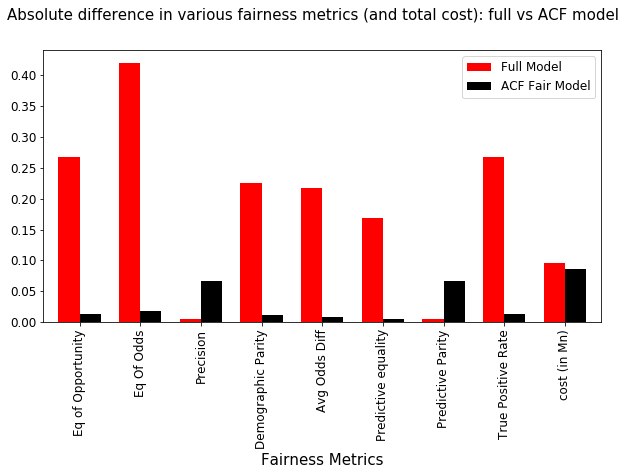

In [88]:
ax = ACF_table.plot.bar(x='Metrics', rot=90, width = 0.7, color=['red', 'black'], figsize=(10,5), fontsize=12)
plt.suptitle('Absolute difference in various fairness metrics (and total cost): full vs ACF model',  
             fontsize=15, y=1)

patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper right', fontsize=12)

ax.set_xlabel('Fairness Metrics', fontsize=15)
plt.show()

<div class="alert alert-block alert-success">
<b>Inference:</b> 
All fairness metrics shows improvement and thus proving that the model is more bias-free in case of ACF fair model.  Comparing this technique with previous we see  metrics like equalised odds to be at 2.12e-02, predictive parity to be at 1.75e-01 and predictive equality to be at 1.07e-02. The cost went down phenomenally to £0.09Mn.
    
   All fairness metrics shows improvement and thus proving that the model is much bias-free in case of ACF fair model. The cost seems to have gone down in ACF fair model compared to full model. However, metrics like precision and predictive parity is showing some trade-off.
</div>

<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="8b"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:1.25em;">Regression (multiple protected features)</span>
</div>

<div class="alert alert-block alert-info">
<b>Remember:</b>

- Here the target variable:
 - ProbabilityOfDefault
- The independent variables are:
 - Age
 - AppliedAmount
 - ExpectedLoss
 - LiabilitiesTotal
 - IncomeTotal
 - Interest
 - LoanDuration
 - MonthlyPayment
- The sensitive variables are:
 - NrOfDependantslessthan3
 - MaritalStatus_1.0
 - MaritalStatus_3.0
 - MaritalStatus_4.0
 </div>

In [89]:
choice = 'MaritalStatus_3.0' #Single MaritalStatus_3.0'

In [90]:
dataacf_Lin = datatest[['ProbabilityOfDefault','Age', 'AppliedAmount', 'ExpectedLoss', 
                        'LiabilitiesTotal', 'IncomeTotal', 'Interest', 'LoanDuration', 'MonthlyPayment',
"NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]

## Full model : Linear Regression
Here we are slecting probablity of default as the target feature and would predict this value using linear regression algorithm

In [91]:
y=dataacf_Lin['ProbabilityOfDefault']*1000
x=dataacf_Lin.drop(columns=['ProbabilityOfDefault'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=696969) #6699

In [92]:
clf_full_Lin = LinearRegression().fit(X_train, y_train)
y_pred=clf_full_Lin.predict(X_test)
print("For full model:")
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE(y_pred, y_test))
print("Mean Absolute Percentage Error:", mape(y_pred, y_test))


For full model:
Mean Squared Error: 1991.3528630946953
Root Mean Squared Error: 44.62457689541376
Mean Absolute Percentage Error: 22.862083236717524


In [93]:
print("For full model:")
A_full=mean_squared_error(y_test[X_test[choice]==0], y_pred[X_test[choice]==0]) #pval = 0 is Privileged
B_full=mean_squared_error(y_test[X_test[choice]==1], y_pred[X_test[choice]==1]) #pval = 1 is Unprivileged
print("Mean Squared Error difference:", abs(B_full-A_full))

A_full=RMSE(y_test[X_test[choice]==0], y_pred[X_test[choice]==0]) #pval = 0 is Privileged
B_full=RMSE(y_test[X_test[choice]==1], y_pred[X_test[choice]==1]) #pval = 1 is Unprivileged
print("Root Mean Squared Error: difference", abs(B_full-A_full))


A_full=mape(y_test[X_test[choice]==0], y_pred[X_test[choice]==0]) #pval = 0 is Privileged
B_full=mape(y_test[X_test[choice]==1], y_pred[X_test[choice]==1]) #pval = 1 is Unprivileged
print("Mean Absolute Percentage Error: difference", abs(B_full-A_full))

For full model:
Mean Squared Error difference: 517.3058864416853
Root Mean Squared Error: difference 6.13462675166425
Mean Absolute Percentage Error: difference 1.061936075034673


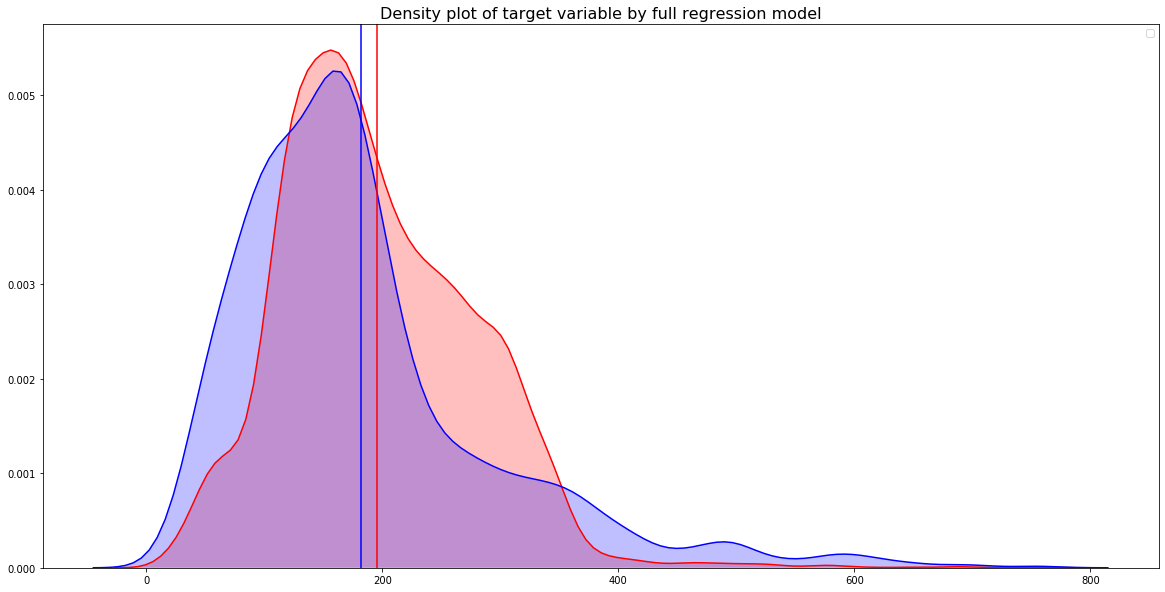

Mean difference of predicted target value (Full Model) between two groups: 13.52945625521528
Skewness difference of predicted target value (Full Model) between two groups: -0.9013968560270103
Kurtosis difference of predicted target value (Full Model) between two groups: -1.9288666897579843


In [94]:
plt.figure(figsize=(20,10))
p1=sns.kdeplot(y_pred[X_test[choice]==0], shade=True, color="r")
p1=sns.kdeplot(y_pred[X_test[choice]==1], shade=True, color="b")
#print(np.mean(y_pred[X_test[choice]==0]) - np.mean(y_pred[X_test[choice]==1]))

plt.title('Density plot of target variable by full regression model', fontsize=16)
plt.axvline(np.mean(y_pred[X_test[choice]==0]), color="r")
plt.axvline(np.mean(y_pred[X_test[choice]==1]), color="b")

plt.legend('a', 'b')
plt.show()

print("Mean difference of predicted target value (Full Model) between two groups:", np.mean(y_pred[X_test[choice]==0]) - 
      np.mean(y_pred[X_test[choice]==1]))
print("Skewness difference of predicted target value (Full Model) between two groups:", skew(y_pred[X_test[choice]==0]) - 
      skew(y_pred[X_test[choice]==1]))
print("Kurtosis difference of predicted target value (Full Model) between two groups:", kurtosis(y_pred[X_test[choice]==0]) - 
      kurtosis(y_pred[X_test[choice]==1]))

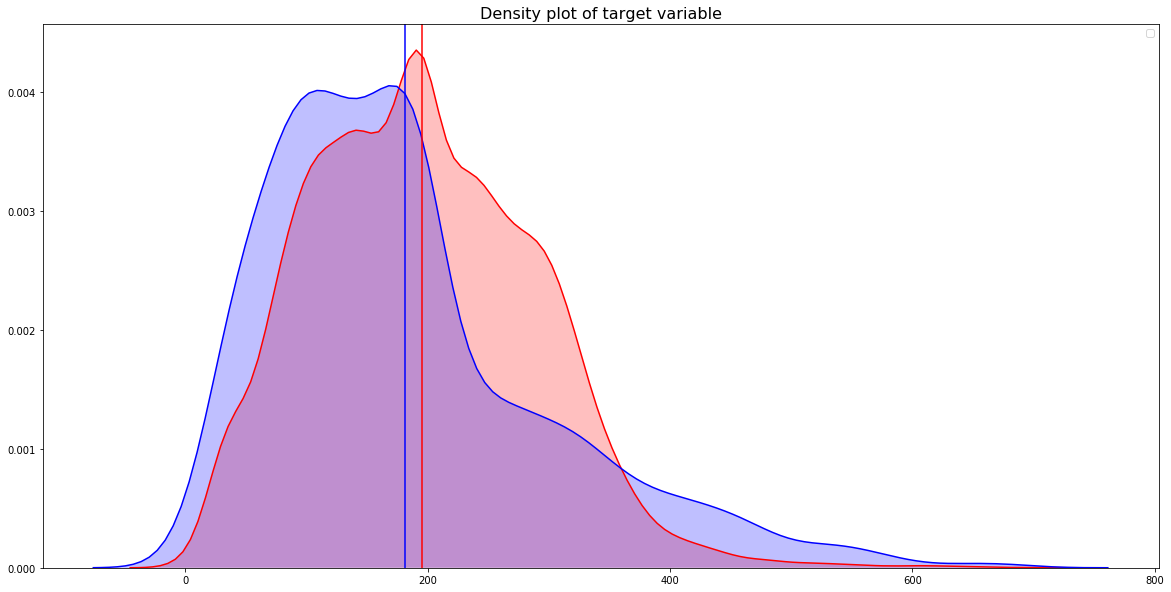

Mean difference of target value between two groups: 14.366330625236145
Skewness difference of target value between two groups: -0.7214417587308593
Kurtosis difference of target value between two groups: -0.9918627356965497


In [95]:
plt.figure(figsize=(20,10))
p1=sns.kdeplot(y_test[X_test[choice]==0], shade=True, color="r")
p1=sns.kdeplot(y_test[X_test[choice]==1], shade=True, color="b")
#print(np.mean(y_test[X_test[choice]==0])-(np.mean(y_test[X_test[choice]==1])))

plt.title('Density plot of target variable', fontsize=16)
plt.axvline(np.mean(y_test[X_test[choice]==0]), color="r")
plt.axvline(np.mean(y_test[X_test[choice]==1]), color="b")

plt.legend('a','b')
plt.show()

print("Mean difference of target value between two groups:", np.mean(y_test[X_test[choice]==0]) -
      (np.mean(y_test[X_test[choice]==1])))
print("Skewness difference of target value between two groups:", skew(y_test[X_test[choice]==0]) -
      (skew(y_test[X_test[choice]==1])))
print("Kurtosis difference of target value between two groups:", kurtosis(y_test[X_test[choice]==0]) -
      (kurtosis(y_test[X_test[choice]==1])))


## Additive counterfactual fair model

In [96]:
y=dataacf_Lin['ProbabilityOfDefault']*1000
x=dataacf_Lin.drop(columns=['ProbabilityOfDefault'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=696969)

**Selecting few protected / sensitive features**

In [97]:
sens=X_train[["NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]

**Regressing each independent variable with all sensitive variables**

In [98]:
clf_age = LinearRegression().fit(sens, X_train['Age'])
clf_AppliedAmount = LinearRegression().fit(sens, X_train['AppliedAmount'])
clf_ExpectedLoss = LinearRegression().fit(sens, X_train['ExpectedLoss'])
clf_LiabilitiesTotal = LinearRegression().fit(sens, X_train['LiabilitiesTotal'])
clf_IncomeTotal = LinearRegression().fit(sens, X_train['IncomeTotal'])
clf_Interest = LinearRegression().fit(sens, X_train['Interest'])
clf_LoanDuration = LinearRegression().fit(sens, X_train['LoanDuration'])
clf_MonthlyPayment = LinearRegression().fit(sens, X_train['MonthlyPayment'])

**Residual of each models**

In [99]:
ageR = X_train['Age'] - clf_age.predict(sens)
AppliedAmountR = X_train['AppliedAmount'] - clf_AppliedAmount.predict(sens)
ExpectedLossR = X_train['ExpectedLoss'] - clf_ExpectedLoss.predict(sens)
LiabilitiesTotalR = X_train['LiabilitiesTotal'] - clf_LiabilitiesTotal.predict(sens)
IncomeTotalR = X_train['IncomeTotal'] - clf_IncomeTotal.predict(sens)
InterestR = X_train['Interest'] - clf_Interest.predict(sens)
LoanDurationR = X_train['LoanDuration'] - clf_LoanDuration.predict(sens)
MonthlyPaymentR = X_train['MonthlyPayment'] - clf_MonthlyPayment.predict(sens)


In [100]:
df_R=pd.DataFrame({'ageR':ageR, 'AppliedAmountR':AppliedAmountR, 'ExpectedLossR':ExpectedLossR, 
                   'LiabilitiesTotalR':LiabilitiesTotalR,
                'IncomeTotalR':IncomeTotalR, 'InterestR':InterestR, 'LoanDurationR':LoanDurationR,
                   'MonthlyPaymentR':MonthlyPaymentR})

**Fitting residuals to the dependent (target) variable**

In [101]:
fair = LinearRegression().fit(df_R, y_train)

**Regressing each independent variable with sensitive variables on test data**

In [102]:
sens=X_test[["NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]
countersens = sens.replace({0:1, 1:0})

In [103]:
clf_age = LinearRegression().fit(sens, X_test['Age'])
clf_AppliedAmount = LinearRegression().fit(sens, X_test['AppliedAmount'])
clf_ExpectedLoss = LinearRegression().fit(sens, X_test['ExpectedLoss'])
clf_LiabilitiesTotal = LinearRegression().fit(sens, X_test['LiabilitiesTotal'])
clf_IncomeTotal = LinearRegression().fit(sens, X_test['IncomeTotal'])
clf_Interest = LinearRegression().fit(sens, X_test['Interest'])
clf_LoanDuration = LinearRegression().fit(sens, X_test['LoanDuration'])
clf_MonthlyPayment = LinearRegression().fit(sens, X_test['MonthlyPayment'])

**Residual of each model on test data**

In [104]:
ageR = X_test['Age'] - clf_age.predict(sens)
AppliedAmountR = X_test['AppliedAmount'] - clf_AppliedAmount.predict(sens)
ExpectedLossR = X_test['ExpectedLoss'] - clf_ExpectedLoss.predict(sens)
LiabilitiesTotalR = X_test['LiabilitiesTotal'] - clf_LiabilitiesTotal.predict(sens)
IncomeTotalR = X_test['IncomeTotal'] - clf_IncomeTotal.predict(sens)
InterestR = X_test['Interest'] - clf_Interest.predict(sens)
LoanDurationR = X_test['LoanDuration'] - clf_LoanDuration.predict(sens)
MonthlyPaymentR = X_test['MonthlyPayment'] - clf_MonthlyPayment.predict(sens)


In [105]:
df_R_test=pd.DataFrame({'ageR':ageR, 'AppliedAmountR':AppliedAmountR, 'ExpectedLossR':ExpectedLossR, 
                        'LiabilitiesTotalR':LiabilitiesTotalR,
                'IncomeTotalR':IncomeTotalR, 'InterestR':InterestR, 'LoanDurationR':LoanDurationR,
                   'MonthlyPaymentR':MonthlyPaymentR})

**Predicting the target variable on fair model developed above**

In [106]:
pred_fair_te = fair.predict(df_R_test)

In [107]:
print("For ACF model:")
print("Mean Squared Error:",mean_squared_error(y_test, pred_fair_te))
print("Root Mean Squared Error:", RMSE(pred_fair_te, y_test))
print("Mean Absolute Percentage Error:", mape(pred_fair_te, y_test))

For ACF model:
Mean Squared Error: 2442.6078661946876
Root Mean Squared Error: 49.422746445282534
Mean Absolute Percentage Error: 28.251163055694807


In [108]:
print("For ACF model:")
A_fair=mean_squared_error(y_test[sens[choice]==0], pred_fair_te[sens[choice]==0]) #pval = 0 is Privileged
B_fair=mean_squared_error(y_test[sens[choice]==1], pred_fair_te[sens[choice]==1]) #pval = 1 is Unprivileged
print("Mean Squared Error difference:", abs(B_fair-A_fair))


A_fair=RMSE(y_test[sens[choice]==0], pred_fair_te[sens[choice]==0]) #pval = 0 is Privileged
B_fair=RMSE(y_test[sens[choice]==1], pred_fair_te[sens[choice]==1]) #pval = 1 is Unprivileged
print("Root Mean Squared Error difference:", abs(B_fair-A_fair))


A_fair=mape(y_test[sens[choice]==0], pred_fair_te[sens[choice]==0]) #pval = 0 is Privileged
B_fair=mape(y_test[sens[choice]==1], pred_fair_te[sens[choice]==1]) #pval = 1 is Unprivileged
print("Mean Absolute Percentage Error difference:", abs(B_fair-A_fair))

For ACF model:
Mean Squared Error difference: 840.4945829206613
Root Mean Squared Error difference: 9.193268944063973
Mean Absolute Percentage Error difference: 3.6977921510466736


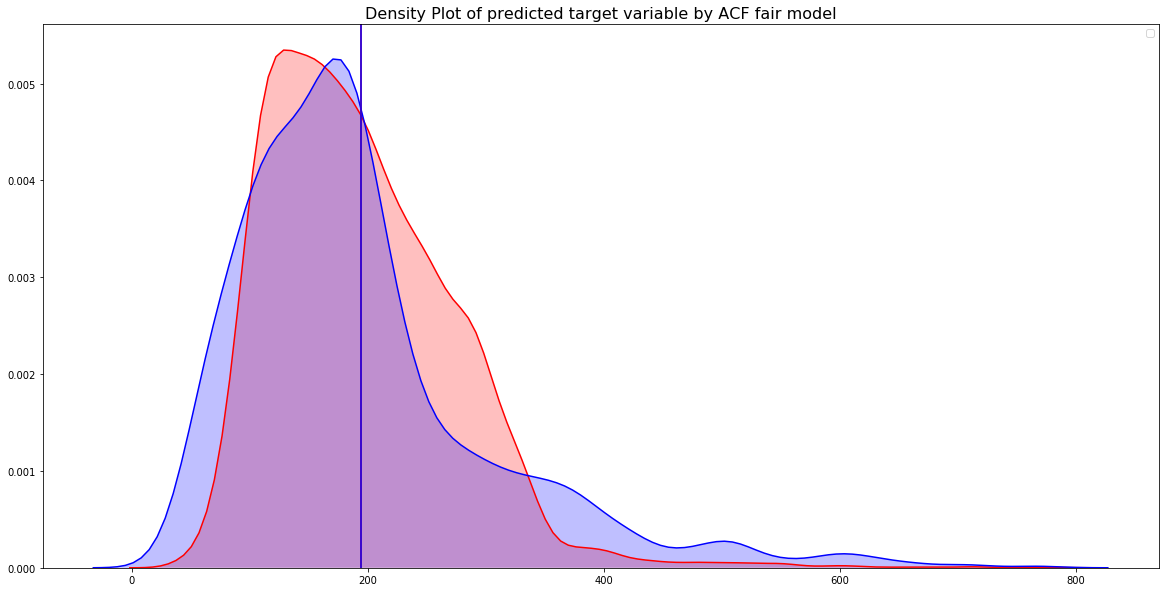

Mean difference of predicted target value (ACF Model) between two groups: 2.842170943040401e-14
Skewness difference of predicted target value (ACF Model) between two groups: -0.49521708845611867
Kurtosis difference of predicted target value (ACF Model) between two groups: -0.4439708520125363


In [109]:
plt.figure(figsize=(20,10))
p1=sns.kdeplot(pred_fair_te[sens[choice]==0], shade=True, color="r")
p1=sns.kdeplot(pred_fair_te[sens[choice]==1], shade=True, color="b")
plt.title('Density Plot of predicted target variable by ACF fair model', fontsize=16)
plt.axvline(np.mean(pred_fair_te[sens[choice]==0]), color="r" )
plt.axvline(np.mean(pred_fair_te[sens[choice]==1]), color="b")


plt.legend('a','b')
plt.show()

print("Mean difference of predicted target value (ACF Model) between two groups:", np.mean(pred_fair_te[sens[choice]==0]) - 
      np.mean(pred_fair_te[sens[choice]==1]))
print("Skewness difference of predicted target value (ACF Model) between two groups:", skew(pred_fair_te[sens[choice]==0]) - 
      skew(pred_fair_te[sens[choice]==1]))
print("Kurtosis difference of predicted target value (ACF Model) between two groups:", kurtosis(pred_fair_te[sens[choice]==0]) - 
      kurtosis(pred_fair_te[sens[choice]==1]))

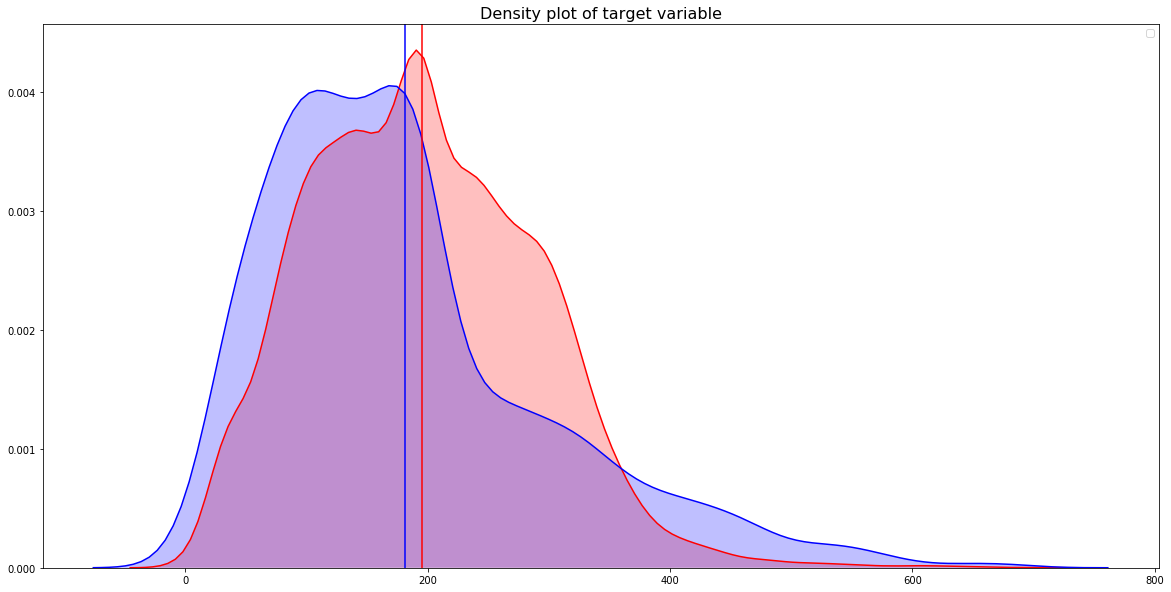

Mean difference of target value between two groups: 14.366330625236145
Skewness difference of target value between two groups: -0.7214417587308593
Kurtosis difference of target value between two groups: -0.9918627356965497


In [110]:
plt.figure(figsize=(20,10))
p1=sns.kdeplot(y_test[sens[choice]==0], shade=True, color="r")
p1=sns.kdeplot(y_test[sens[choice]==1], shade=True, color="b")
plt.title('Density plot of target variable', fontsize=16)
plt.axvline(np.mean(y_test[sens[choice]==0]), color="r")
plt.axvline(np.mean(y_test[sens[choice]==1]), color="b")


plt.legend('a','b')
plt.show()

print("Mean difference of target value between two groups:", np.mean(y_test[sens[choice]==0]) - 
      np.mean(y_test[sens[choice]==1]))
print("Skewness difference of target value between two groups:", skew(y_test[sens[choice]==0]) - 
      skew(y_test[sens[choice]==1]))
print("Kurtosis difference of target value between two groups:", kurtosis(y_test[sens[choice]==0]) - 
      kurtosis(y_test[sens[choice]==1]))

**Summary of Model performace**

Metrics  | Data | Full Model | ACF |
------------- | ------------- | ------------ | ------------ |
Mean  | 14.3 |13.5| 2.8e-14
Skewness  | -0.72|-0.90|-0.49
Kurtosis  | -0.99|-1.92|-0.44

<div class="alert alert-block alert-success">
<b>Inference:</b>
    The distribution of target value (probability of default) between two groups is quite varied in the original data (evident from the large difference in mean, skewness and kurtosis) and has worsed when a full model was developed using linear regression algorithm. However, the ACF model show that the distribution of target value among the two groups is very similar and the difference in mean, skewness and kurtosis has reduced dramatically.
</div>

<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="8c"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:1.25em;">Regression on counterfactual sensitive data (multiple protected features)</span>
</div>

<div class="alert alert-block alert-info">
<b>Remember:</b>
The theme of CF is <b>"What would have been my prediction if - all else held causally equal - I was member of another protected group?"</b>
    
Theoretically to check the need of ACF model for some predictor ${Y}$ with data ${D}$={${x_i}$, ${s_i}$}, first develop a full model ${M}$ with all features and fit the test data with as is sensitive features ${S}$ and note the predictions $\hat{Y}$ and error $\epsilon$. In next steps fit the model again with the inverse of ${S}$ i.e., ${S'}$ and find the predictions $\hat{Y'}$ and $\epsilon'$. In third step find ${E}$ as $\hat{Y} - \hat{Y'}$ and  $\epsilon$-$\epsilon'$ to satisfy:

$$
\begin{array}
{P}(\hat{Y}_{{s}={s'}}={Y} \mid {X}={x}, {S}={s'}) = {P}(\hat{Y}_{{s}={s}}={Y} \mid {X}={x}, {S}={s})
\end{array}
$$
    
In next set of steps, for ${M}_{ACF}$ model, fit the test data with as is sensitive features ${S}$ and note the predictions $\hat{Y}_{ACF}$ and error $\epsilon_{ACF}$. In next steps fit the model again with inverse of ${S}$ i.e., ${S'}$ and find the predictions $\hat{Y'}_{ACF}$. In third step find ${E'}$ as $\epsilon'_{ACF}$ as $\hat{Y}_{ACF}- \hat{Y'}_{ACF}$ and  $\epsilon_{ACF}-\epsilon'_{ACF}$ to satisfy:
$$
\begin{array}
{P}(\hat{Y}_{{s}={s'}}={Y} \mid {X}={x}, {S}={s'}) = {P}(\hat{Y}_{{s}={s}}={Y} \mid {X}={x}, {S}={s})
\end{array}
$$

The <b>[Counterfactual unfairness](https://arxiv.org/pdf/1907.01040.pdf) (CFU)</b> score would be  $\frac{1}{n}\sum(\epsilon - \epsilon_{ACF})^{2}$ or minimize $\frac{1}{n}\sum({E}$ - ${E'})^{2}$ . The aim should to minimize the CFU.
In an ideal case, the model ${M}$ should have zero $\epsilon$ given ${S'}$

Thus, ACF can be described as:

$$
\begin{array}
{}
\theta = \arg_{\theta}min \sum {l}({f_{\theta}(\hat \epsilon_{i}),{y_{i}})}
\\
where, \hat \epsilon_{i} \in {\hat \epsilon_{x_{1i}}\cdots\hat \epsilon_{x_{ni}}}
\end{array}
$$

</div>

In [111]:
dataacf_Lin = datatest[['ProbabilityOfDefault','Age', 'AppliedAmount', 'ExpectedLoss', 
                        'LiabilitiesTotal', 'IncomeTotal', 'Interest', 'LoanDuration', 'MonthlyPayment']]
sens = datatest[["NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]

## Full model : Linear Regression
Here we are slecting probablity of default as the target feature and would predict this value using linear regression algorithm

In [112]:
fulldata = pd.concat([dataacf_Lin, sens], axis=1)

In [113]:
y=fulldata['ProbabilityOfDefault']*1000
x=fulldata.drop(columns=['ProbabilityOfDefault'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=696969) #6699

In [114]:
clf_full_Lin = LinearRegression().fit(X_train, y_train)
y_pred_F = clf_full_Lin.predict(X_test)
print("For full model:")
print("Mean Squared Error:",mean_squared_error(y_test, y_pred_F))
print("Root Mean Squared Error:", RMSE(y_pred_F, y_test))

For full model:
Mean Squared Error: 1991.3528630946953
Root Mean Squared Error: 44.62457689541376


**Error for the full model with sensitive features included**

In [115]:
error = y_test - y_pred_F

### Testing the full model on counterfactual sensitive data

In [116]:
senstest=X_test[["NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]
test=X_test[['Age', 'AppliedAmount', 'ExpectedLoss', 
                        'LiabilitiesTotal', 'IncomeTotal', 'Interest', 'LoanDuration', 'MonthlyPayment']]

counter_senstest = senstest.replace({0:1, 1:0})
countertest = pd.concat([test, counter_senstest], axis=1)

In [117]:
y_pred_CF=clf_full_Lin.predict(countertest)
print("For full model:")
print("Mean Squared Error:",mean_squared_error(y_test, y_pred_CF))
print("Root Mean Squared Error:", RMSE(y_pred_CF, y_test))

For full model:
Mean Squared Error: 7947.5343207763535
Root Mean Squared Error: 89.14894458588029


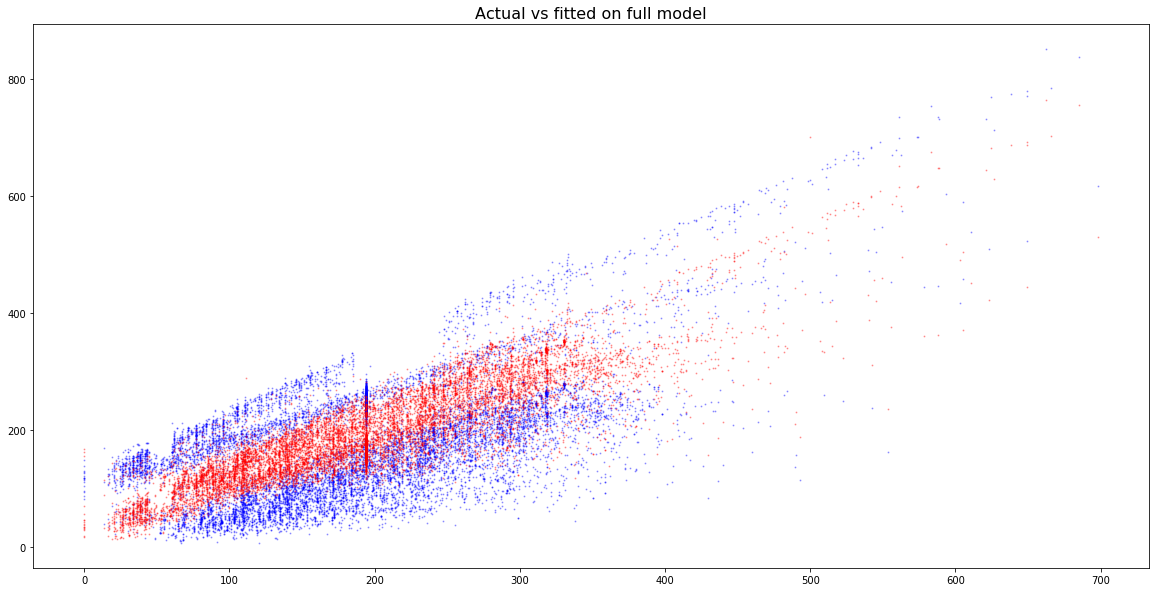

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

plt.scatter(y_test, y_pred_CF, s=1, alpha=0.3, color='b')
plt.scatter(y_test, y_pred_F, s=1, alpha = 0.3, color='r')

plt.title('Actual vs fitted on full model', fontsize=16)


plt.show()

**Error for the full model with counter sensitive features included**

In [119]:
errorcounter = y_test - y_pred_CF

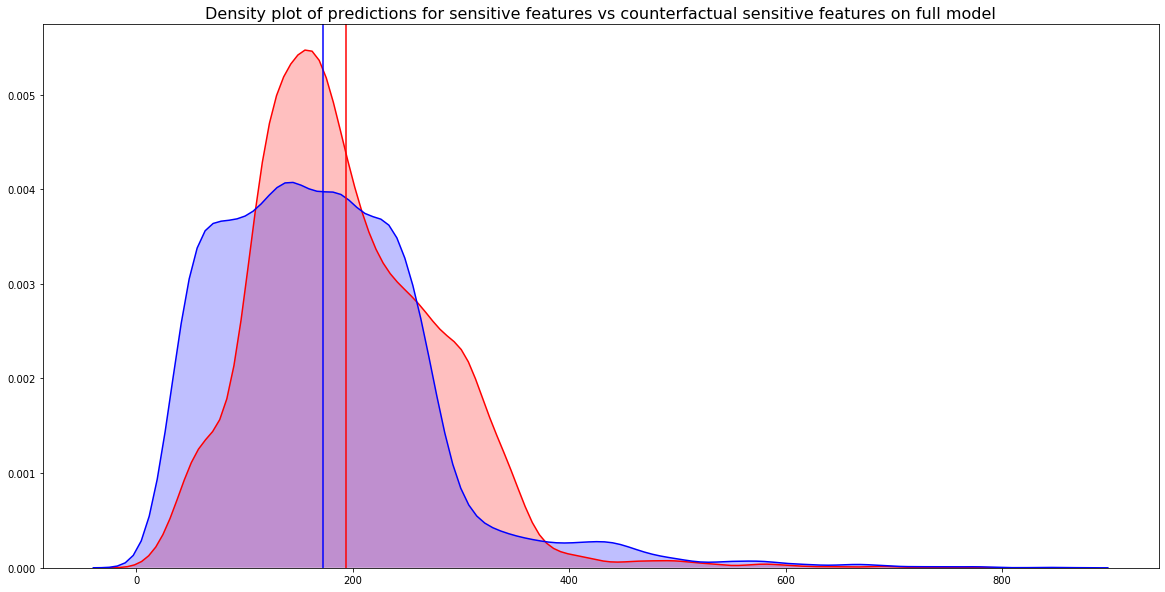

In [120]:
plt.figure(figsize=(20,10))
p1=sns.kdeplot(y_pred_F, shade=True, color="r")
p1=sns.kdeplot(y_pred_CF, shade=True, color="b")
plt.title('Density plot of predictions for sensitive features vs counterfactual sensitive features on full model', fontsize=16)
plt.axvline(np.mean(y_pred_F), color="r")
plt.axvline(np.mean(y_pred_CF), color="b")

plt.show()

**Counterfactual unfairness (CFU) score for full model**

In [121]:
CUF1 = (np.sum(np.square(errorcounter - error))/len(error))
CUF1

5949.808667508931

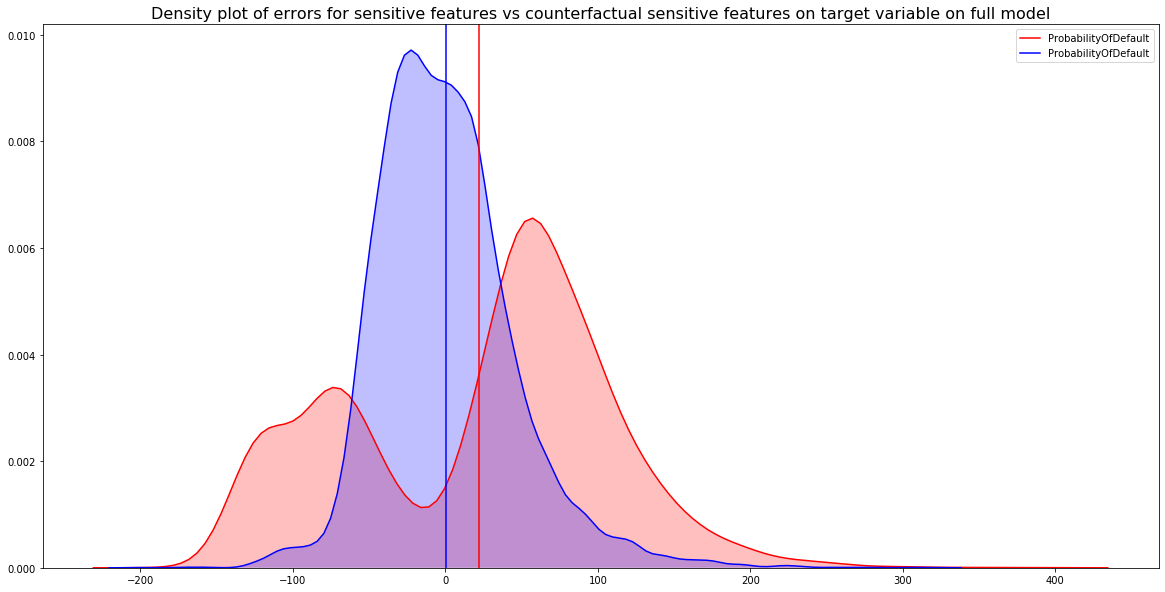

In [122]:
plt.figure(figsize=(20,10))
p1=sns.kdeplot(errorcounter, shade=True, color="r")
p1=sns.kdeplot(error, shade=True, color="b")
plt.title('Density plot of errors for sensitive features vs counterfactual sensitive features on target variable on full model', fontsize=16)
plt.axvline(np.mean(errorcounter), color="r")
plt.axvline(np.mean(error), color="b")

plt.show()

## Additive counterfactual fair model

In [123]:
dataacf_Lin = datatest[['ProbabilityOfDefault','Age', 'AppliedAmount', 'ExpectedLoss', 
                        'LiabilitiesTotal', 'IncomeTotal', 'Interest', 'LoanDuration', 'MonthlyPayment', 
                        "NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]

In [124]:
y=dataacf_Lin['ProbabilityOfDefault']*1000
x=dataacf_Lin.drop(columns=['ProbabilityOfDefault'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=696969)

**Selecting few protected / sensitive features**

In [125]:
sens=X_train[["NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]

**Regressing each independent variable with all sensitive variables**

In [126]:
clf_age = LinearRegression().fit(sens, X_train['Age'])
clf_AppliedAmount = LinearRegression().fit(sens, X_train['AppliedAmount'])
clf_ExpectedLoss = LinearRegression().fit(sens, X_train['ExpectedLoss'])
clf_LiabilitiesTotal = LinearRegression().fit(sens, X_train['LiabilitiesTotal'])
clf_IncomeTotal = LinearRegression().fit(sens, X_train['IncomeTotal'])
clf_Interest = LinearRegression().fit(sens, X_train['Interest'])
clf_LoanDuration = LinearRegression().fit(sens, X_train['LoanDuration'])
clf_MonthlyPayment = LinearRegression().fit(sens, X_train['MonthlyPayment'])

**Residual of each models**

In [127]:
ageR = X_train['Age'] - clf_age.predict(sens)
AppliedAmountR = X_train['AppliedAmount'] - clf_AppliedAmount.predict(sens)
ExpectedLossR = X_train['ExpectedLoss'] - clf_ExpectedLoss.predict(sens)
LiabilitiesTotalR = X_train['LiabilitiesTotal'] - clf_LiabilitiesTotal.predict(sens)
IncomeTotalR = X_train['IncomeTotal'] - clf_IncomeTotal.predict(sens)
InterestR = X_train['Interest'] - clf_Interest.predict(sens)
LoanDurationR = X_train['LoanDuration'] - clf_LoanDuration.predict(sens)
MonthlyPaymentR = X_train['MonthlyPayment'] - clf_MonthlyPayment.predict(sens)


In [128]:
df_R=pd.DataFrame({'ageR':ageR, 'AppliedAmountR':AppliedAmountR, 'ExpectedLossR':ExpectedLossR, 
                   'LiabilitiesTotalR':LiabilitiesTotalR,
                'IncomeTotalR':IncomeTotalR, 'InterestR':InterestR, 'LoanDurationR':LoanDurationR,
                   'MonthlyPaymentR':MonthlyPaymentR})

**Fitting residuals to the dependent (target) variable**

In [129]:
fair = LinearRegression().fit(df_R, y_train)

**Regressing each independent variable with sensitive variables on test data**

In [130]:
sens=X_test[["NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]

In [131]:
clf_age = LinearRegression().fit(sens, X_test['Age'])
clf_AppliedAmount = LinearRegression().fit(sens, X_test['AppliedAmount'])
clf_ExpectedLoss = LinearRegression().fit(sens, X_test['ExpectedLoss'])
clf_LiabilitiesTotal = LinearRegression().fit(sens, X_test['LiabilitiesTotal'])
clf_IncomeTotal = LinearRegression().fit(sens, X_test['IncomeTotal'])
clf_Interest = LinearRegression().fit(sens, X_test['Interest'])
clf_LoanDuration = LinearRegression().fit(sens, X_test['LoanDuration'])
clf_MonthlyPayment = LinearRegression().fit(sens, X_test['MonthlyPayment'])

**Residual of each model on test data**

In [132]:
ageR = X_test['Age'] - clf_age.predict(sens)
AppliedAmountR = X_test['AppliedAmount'] - clf_AppliedAmount.predict(sens)
ExpectedLossR = X_test['ExpectedLoss'] - clf_ExpectedLoss.predict(sens)
LiabilitiesTotalR = X_test['LiabilitiesTotal'] - clf_LiabilitiesTotal.predict(sens)
IncomeTotalR = X_test['IncomeTotal'] - clf_IncomeTotal.predict(sens)
InterestR = X_test['Interest'] - clf_Interest.predict(sens)
LoanDurationR = X_test['LoanDuration'] - clf_LoanDuration.predict(sens)
MonthlyPaymentR = X_test['MonthlyPayment'] - clf_MonthlyPayment.predict(sens)


In [133]:
df_R_test=pd.DataFrame({'ageR':ageR, 'AppliedAmountR':AppliedAmountR, 'ExpectedLossR':ExpectedLossR, 
                        'LiabilitiesTotalR':LiabilitiesTotalR,
                'IncomeTotalR':IncomeTotalR, 'InterestR':InterestR, 'LoanDurationR':LoanDurationR,
                   'MonthlyPaymentR':MonthlyPaymentR})

**Predicting the target variable on fair model developed above**

In [134]:
pred_fair_te = fair.predict(df_R_test)

In [135]:
print("For ACF model:")
print("Mean Squared Error:",mean_squared_error(y_test, pred_fair_te))
print("Root Mean Squared Error:", RMSE(pred_fair_te, y_test))
print("Mean Absolute Percentage Error:", mape(pred_fair_te, y_test))

For ACF model:
Mean Squared Error: 2442.6078661946876
Root Mean Squared Error: 49.422746445282534
Mean Absolute Percentage Error: 28.251163055694807


**Error for the ACF model with residuals of sensitive features**

In [136]:
acferror = pd.Series(y_test - pred_fair_te, name="Sensitive data")

### Testing the ACF model on counterfactual sensitive data

In [137]:
countersens = sens.replace({0:1, 1:0})

In [138]:
#clf_age = LinearRegression().fit(countersens, X_test['Age'])
#clf_AppliedAmount = LinearRegression().fit(countersens, X_test['AppliedAmount'])
#clf_ExpectedLoss = LinearRegression().fit(countersens, X_test['ExpectedLoss'])
#clf_LiabilitiesTotal = LinearRegression().fit(countersens, X_test['LiabilitiesTotal'])
#clf_IncomeTotal = LinearRegression().fit(countersens, X_test['IncomeTotal'])
#clf_Interest = LinearRegression().fit(countersens, X_test['Interest'])
#clf_LoanDuration = LinearRegression().fit(countersens, X_test['LoanDuration'])
#clf_MonthlyPayment = LinearRegression().fit(countersens, X_test['MonthlyPayment'])

In [139]:
ageR = X_test['Age'] - clf_age.predict(countersens)
AppliedAmountR = X_test['AppliedAmount'] - clf_AppliedAmount.predict(countersens)
ExpectedLossR = X_test['ExpectedLoss'] - clf_ExpectedLoss.predict(countersens)
LiabilitiesTotalR = X_test['LiabilitiesTotal'] - clf_LiabilitiesTotal.predict(countersens)
IncomeTotalR = X_test['IncomeTotal'] - clf_IncomeTotal.predict(countersens)
InterestR = X_test['Interest'] - clf_Interest.predict(countersens)
LoanDurationR = X_test['LoanDuration'] - clf_LoanDuration.predict(countersens)
MonthlyPaymentR = X_test['MonthlyPayment'] - clf_MonthlyPayment.predict(countersens)


In [140]:
df_R_test=pd.DataFrame({'ageR':ageR, 'AppliedAmountR':AppliedAmountR, 'ExpectedLossR':ExpectedLossR, 
                        'LiabilitiesTotalR':LiabilitiesTotalR,
                'IncomeTotalR':IncomeTotalR, 'InterestR':InterestR, 'LoanDurationR':LoanDurationR,
                   'MonthlyPaymentR':MonthlyPaymentR})

In [141]:
pred_fair_te_acf = fair.predict(df_R_test)

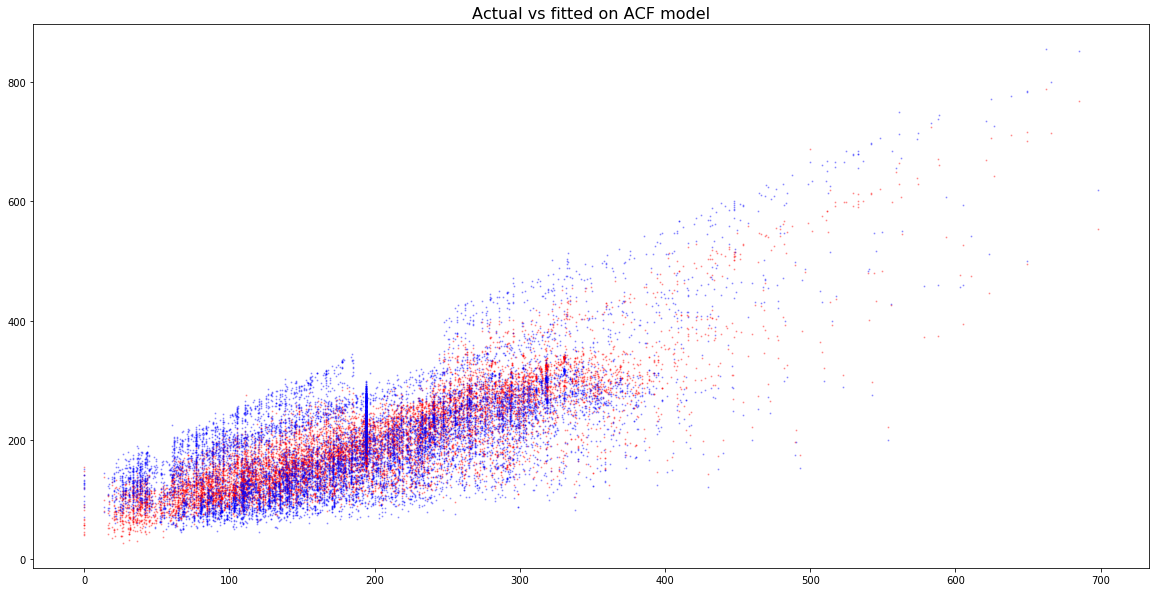

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.scatter(y_test, pred_fair_te, s=1, alpha=0.3, color='r')
plt.scatter(y_test, pred_fair_te_acf, s=1, alpha=0.3, color='b')


plt.title('Actual vs fitted on ACF model', fontsize=16)

plt.show()


**Error for the ACF model with residuals of sensitive features**

In [143]:
counter_acferror = pd.Series(y_test - pred_fair_te_acf, name="Counterfactual sensitive data")

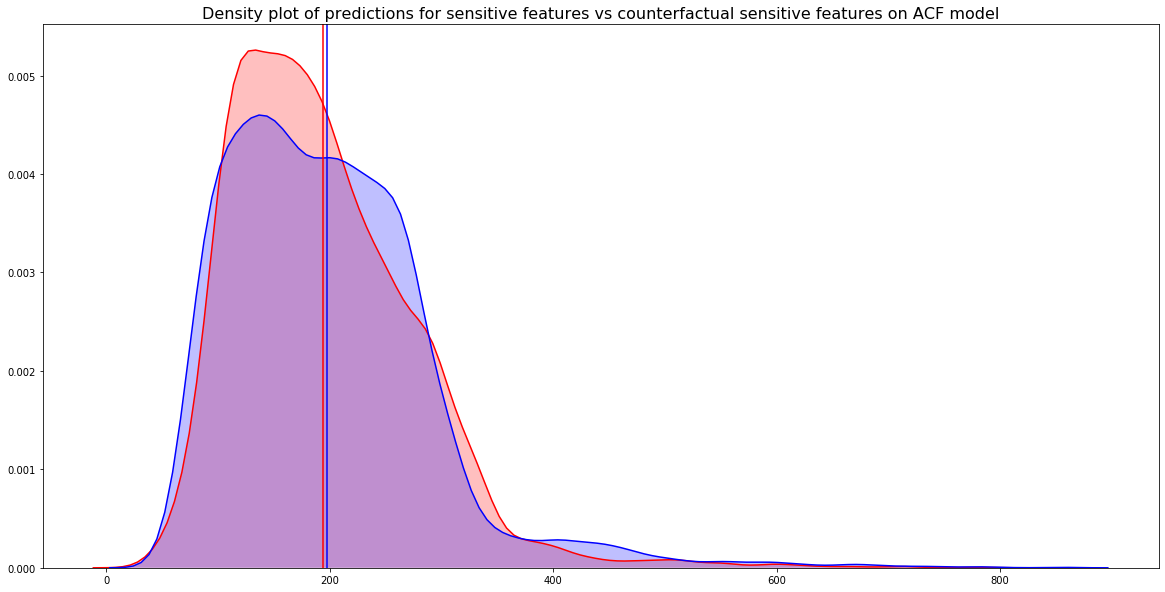

In [144]:
plt.figure(figsize=(20,10))
p1=sns.kdeplot(pred_fair_te, shade=True, color="r")
p1=sns.kdeplot(pred_fair_te_acf, shade=True, color="b")
plt.title('Density plot of predictions for sensitive features vs counterfactual sensitive features on ACF model', fontsize=16)
plt.axvline(np.mean(pred_fair_te), color="r")
plt.axvline(np.mean(pred_fair_te_acf), color="b")

plt.show()

**Counterfactual unfairness (CFU) score for ACF model**

In [145]:
CUF2 = (np.sum(np.square(counter_acferror - acferror))/len(acferror))
CUF2

1590.2688192490739

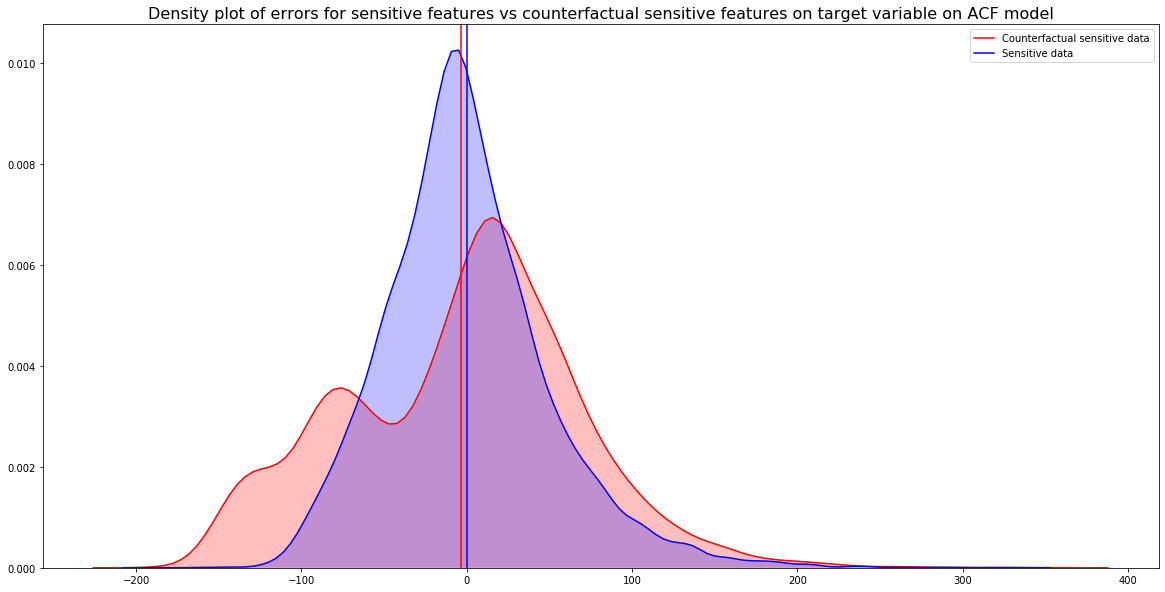

In [146]:
plt.figure(figsize=(20,10))
p1=sns.kdeplot(counter_acferror, shade=True, color="r")
p1=sns.kdeplot(acferror, shade=True, color="b")
plt.title('Density plot of errors for sensitive features vs counterfactual sensitive features on target variable on ACF model', fontsize=16)
plt.axvline(np.mean(counter_acferror), color="r")
plt.axvline(np.mean(acferror), color="b")

plt.show()

<div class="alert alert-block alert-success">
<b>Inference:</b> 
    The result from the CFU technique showed that CFUfull was 5949.80 and CFUacf was 1590.26. The CFU score for full model is much higher than CFU score of the ACF model and the distribution of predictions for factual and counterfactual in case of ACF is quite similar. This illustrates that the ACF model prediction has very less (compared to vanilla model) impact of sensitive data. In other words, the prediction wont change drastically if the fact of sensitive / protected feature is reverses or is made counterfactual.
</div>

<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="R"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Reject option classifier</span>
</div>

Let ${Y} ∈ ({Y^+}, {Y^-})$ be the actual labels with ${Y^+}$ being favourable class and ${Y^-}$ being unfavourable class belonging to dataset {${X_i}, {Y_i}$} with $N$ data points. Lets ${S}$ be protected features with ${S_d}$ be disadvantegous group / unprivileged group and ${S_a}$ being advantegous group / privileged group. Let $\mathbf{w}$ be the base classifier.

here we would like to minimize $\mathbb{P}({Y}={Y^+} \mid {S}={S_a}) - \mathbb{P}({Y}={Y^+} \mid {S}={S_d})$

Thus the posterior probability of any classifier can be given as $\mathbb{P}({Y}|{X})$. Here if $\mathbb{P}({Y^+}|{X})$ is higher (either close to 1 or 0) then the label assigned would be certain and hard (or vice versa - in case of probability near 0.5)

In such a scenario, [Reject Option Classifier](https://mine.kaust.edu.sa/Documents/papers/ICDM_2012.pdf) (ROC) is implemented for the labels with probability falling into critical region defined as

$max [\mathbb{P}({Y^+}\mid{S}), 1-\mathbb{P}({Y^+}\mid{S})] \leq {\theta}$

${\text{subject to}}$ 0.5<$\theta$<1 : called critical region

The [algorithm](https://github.com/cosmicBboy/themis-ml/blob/master/themis_ml/postprocessing/reject_option_classification.py), for all probabilities outside critical region the label would be unchanged but for probability falling into criticsal region the label assignment would be conducted as per the below rule:

if the ${r_i} ∈ {S_d}$ then label would be ${Y^+}$ and if ${r_i} ∈ {S_a}$ then label would be ${Y^-}$, , here ${r_i}$ are predicted probabilities.

This concept would well work for multiple (ensemble) classifier $\mathbf{w_k (w_1, w_2,..w_k)}$ with posterior probability defined as $\mathbb{P}({Y}, \mathbf{w_k}|{X})$.

In [416]:
choice = 'MaritalStatus_3.0' #Single 'MaritalStatus_3.0'
dataacf = datatest[['Default','Age', 'AppliedAmount', 'ExpectedLoss', 'LiabilitiesTotal', 'IncomeTotal', 
                    'Interest', 'LoanDuration', 'MonthlyPayment',
"NrOfDependantslessthan3", 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0']]
y=dataacf['Default']
x=dataacf.drop(columns=['Default'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=6666)
clf_full = LogisticRegression(random_state=0, solver='liblinear',
                              multi_class='ovr').fit(X_train, y_train)
y_pred=clf_full.predict(X_test)
y_pred_prob=clf_full.predict_proba(X_test)[:,0]
print("Accuracy of the full model:", clf_full.score(X_test, y_test))

Accuracy of the full model: 0.7739910313901345


- pval = 0, upval = 1
- fav = 0, high prob
- unfav = 1, low prob

In [417]:
DECISION_THRESHOLD = 0.5
theta = 0.1
demote = False
pval = 0 #privileged : see the above heatmaps
upval = int(not pval) #Unprivileged

In [418]:
pred_prob = y_pred_prob.copy() #probabilities of getting output as 0 or favourable (high probability high case of 0 or fav)
s = X_test[choice]

In [419]:
np.sum(s)

1340

In [420]:
flip_candidates = np.ones_like(pred_prob).astype(bool) \
            if demote else s == upval #unprivileged group

np.sum(flip_candidates) #all unprivileged

1340

In [421]:
under_theta_index = np.where(
            (np.abs(pred_prob - 0.5) < theta) & flip_candidates & (pred_prob<0.5)) 
#finding unprivileged & unfavourable within the threshold limit as defined by theta

len(pred_prob[under_theta_index])

261

In [424]:
pred_prob[under_theta_index] = 1-pred_prob[under_theta_index] #flipping the probabilities

In [426]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [427]:
y_pred_prob

array([0.85298896, 0.82787639, 0.8529303 , ..., 0.89547124, 0.82070595,
       0.5166517 ])

In [428]:
pred_prob

array([0.85298896, 0.82787639, 0.8529303 , ..., 0.89547124, 0.82070595,
       0.5166517 ])

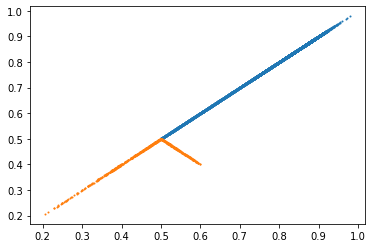

In [429]:
df1 = pd.DataFrame(dict(x=pred_prob, y=y_pred_prob, label=y_pred))
groups = df1.groupby('label')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=1, label=name)
#ax.legend()



plt.show()

In [430]:
df = pd.DataFrame(dict(x=pred_prob, y=y_pred_prob, label=s))
groups = df.groupby('label')

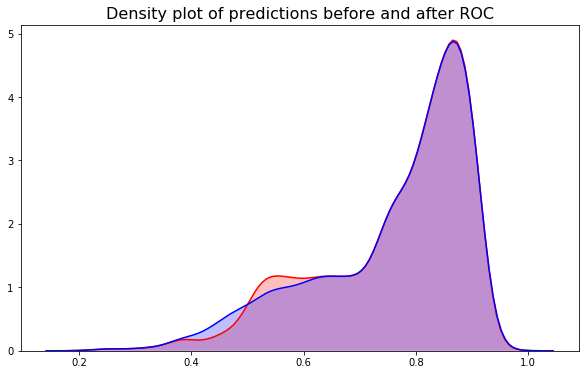

In [432]:
plt.figure(figsize=(10,6))
p1=sns.kdeplot(pred_prob, shade=True, color="r")
p1=sns.kdeplot(y_pred_prob, shade=True, color="b")
plt.title('Density plot of predictions before and after ROC', fontsize=16)
plt.show()

In [433]:
rocdata=pred_prob.copy()
rocbin=np.where(rocdata > 0.5, 0, 1)
rocbin

array([0, 0, 0, ..., 0, 0, 0])

In [434]:
tn_up, fp_up, fn_up, tp_up = confusion_matrix(y_test[s==upval], rocbin[s==upval]).ravel()
tn_p, fp_p, fn_p, tp_p = confusion_matrix(y_test[s==pval], rocbin[s==pval]).ravel()
ROC = acfmetrics(tn_up, fp_up, fn_up, tp_up, tn_p, fp_p, fn_p, tp_p)

In [435]:
tn_up, fp_up, fn_up, tp_up = confusion_matrix(y_test[s==upval], y_pred[s==upval]).ravel()
tn_p, fp_p, fn_p, tp_p = confusion_matrix(y_test[s==pval], y_pred[s==pval]).ravel()
Fullmodel = acfmetrics(tn_up, fp_up, fn_up, tp_up, tn_p, fp_p, fn_p, tp_p)

In [436]:
headers=["Eq of Opportunity", "Eq Of Odds", "Precision", 
         "Demographic Parity", "Avg Odds Diff", "Predictive equality", "Predictive Parity", "True Positive Rate", 
         'cost (in Mn)']
ROC={'Metrics':headers, 
             'Full Model':list(Fullmodel), 'ROC Fair Model':list(ROC)}
ROC_table=pd.DataFrame.from_dict(ROC)
#ROC_table

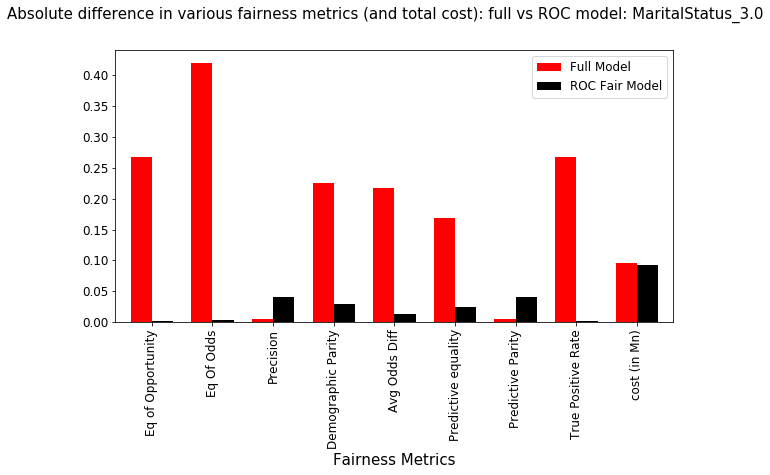

In [437]:
ax = ROC_table.plot.bar(x='Metrics', rot=90, width = 0.7, color=['red', 'black'], figsize=(10,5), fontsize=12)
plt.suptitle('Absolute difference in various fairness metrics (and total cost): full vs ROC model: {}'.format(choice),  
             fontsize=15, y=1)

patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper right', fontsize=12)

ax.set_xlabel('Fairness Metrics', fontsize=15)
plt.show()

In [438]:
def thetha(y_test, y_pred_prob, X_test, protected_label, pval = 1, DECISION_THRESHOLD = 0.5, demote = False):
    upval = int(not pval) #Unprivileged
    
    pred_prob = y_pred_prob.copy() #probabilities of getting output as 0 or favourable (high probability high case of 0 or fav)
    s = X_test[protected_label]
    
    flip_candidates = np.ones_like(pred_prob).astype(bool) \
            if demote else s == upval #unprivileged group
    
    thetha = np.arange(0.01, 0.99, 0.01)
    
    ROC=[]
    cnt = 0
    for t1 in thetha:
        under_theta_index = np.where(
            (np.abs(pred_prob - 0.5) < t1) & flip_candidates & (pred_prob<0.5))
        
        pred_prob[under_theta_index] = 1-pred_prob[under_theta_index] #flipping the probabilities
        
        rocdata=pred_prob.copy()
        rocbin=np.where(rocdata > 0.5, 0, 1)
        
        tn_up, fp_up, fn_up, tp_up = confusion_matrix(y_test[s==upval], rocbin[s==upval]).ravel()
        tn_p, fp_p, fn_p, tp_p = confusion_matrix(y_test[s==pval], rocbin[s==pval]).ravel()
        results = acfmetrics(tn_up, fp_up, fn_up, tp_up, tn_p, fp_p, fn_p, tp_p)
        
        #print(results)
        
        ROC.append(results)
        
    
    return ROC

In [439]:
jj=thetha(y_test, y_pred_prob, X_test, choice, pval = pval)


In [440]:
thetha = np.arange(0.01, 0.99, 0.01)
df_ROC = pd.DataFrame(jj, columns=["Eq of Opportunity", "Eq Of Odds", "Precision", 
         "Demographic Parity", "Avg Odds Diff", "Predictive equality", "Predictive Parity", "True Positive Rate", 
         'cost in Mn'])
df_ROC['thetha'] = thetha
#df_ROC.head(8).T

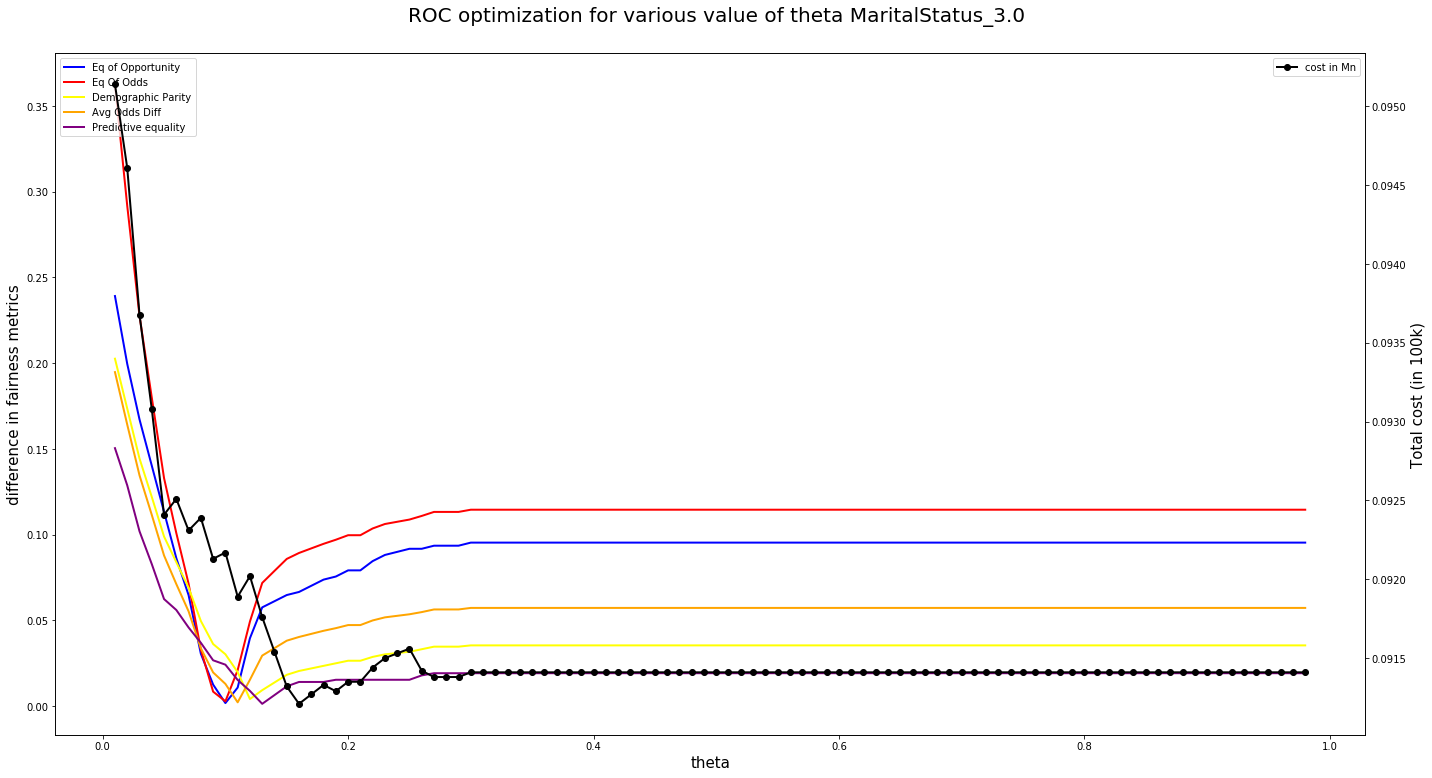

In [441]:

fig, ax1 = plt.subplots(figsize=(20,10))
fig.suptitle('ROC optimization for various value of theta {}'.format(choice), fontsize=20, y=1.05)


ax1.plot( 'thetha', 'Eq of Opportunity', data=df_ROC, marker='', color='blue', linewidth=2)
ax1.plot( 'thetha', 'Eq Of Odds', data=df_ROC, marker='', color='red', linewidth=2)
ax1.plot( 'thetha', 'Demographic Parity', data=df_ROC, marker='', color='yellow', linewidth=2)
ax1.plot( 'thetha', 'Avg Odds Diff', data=df_ROC, marker='', color='orange', linewidth=2)
ax1.plot( 'thetha', 'Predictive equality', data=df_ROC, marker='', color='purple', linewidth=2)

ax2 = ax1.twinx() 

ax2.plot( 'thetha', 'cost in Mn', data=df_ROC, marker='o', color='black', linewidth=2)

patches, labels = ax1.get_legend_handles_labels()
ax1.legend(patches, labels, loc='upper left', fontsize=10)

patches, labels = ax2.get_legend_handles_labels()
ax2.legend(patches, labels, loc='upper left', fontsize=14)

ax1.set_ylabel('difference in fairness metrics', fontsize=15)
ax2.set_ylabel('Total cost (in 100k)', fontsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend()

ax1.set_xlabel('theta', fontsize=15)
plt.show()

<div class="alert alert-block alert-success">
<b>Inference:</b>
The implementation of ROC on sensitive feature Single (MaritialStatus\_3.0) shows that the fairness metrics like equality of opportunity, equalised odds, demographic parity, average odds difference, predictive equality, TPR shows very little discrimination. The cost seems to have gone don by new notches too. The optimization graphs further shows that optimal value of theta that can be considered. Its vivid that the optimal theta to minimize all fairness metrics and cost would be between 0.1 and 0.2.
    The first plot on top shows the scatter plot for actual predicted probabilities and predicted probabilities after ROC calibration. The second plot highlights the sensitive features and it can be that only unprivileged class has got affected. The third plot shows distribution for  actual predicted probabilities and predicted probabilities after ROC calibration. The first below at bottom show change different fairness metrics (and total cost) before and after  ROC calibration while the last plot shows the fairness metrics and total cost for various values of theta
</div>

*In order to compare all the methods for the given scenario in question, we need to focus on predictive parity and predictive equality. In the first method, where weights were used in a vanilla classification algorithm as sample weights, the fairness metrics predictive equality and predictive parity performed really well. There was some improvement in fairness metrics and cost also seemed to drop down by few notches. However, the discrimination was still present and only one protected feature was addressed. There are a few more protected features that may be a cause of algorithmic bias. In such case, an optimized (use threshold calibration) method was used, but here too it was seen that the cost was still very high with a small positive change in discrimination.
With the intention of addressing multiple protected feature, ACF was tested. In case of ACF, the cost went down phenomenally and there was significant improvement in all three fairness-metrics. The decrease in cost was at the tune of 38\% and the metric improvement was at a tune of 70\%. However, the only issue with this technique was its complexity. 
Thus, another technique was tested. In the method called ROC, there was no change in terms of cost as compared to ACF method, but there was some positive change for equalized odds. In case of ROC optimized, the cost remained same, but then the fairness metrics performed better compared to ROC default. Thus, the last two option left was ROC optimized and ACF.
Comparing ROC optimized and ACF, it’s clear that the cost in both the case were identical. The only metric that performed really good for ACF was equalized odds. For the other two metrics ROC optimized performed much better. However, given the fact that there is no significant increase in the cost and ACF address problem of multiple bias, its highly suggested to opt for ACF in this use case. 
In any other use case, if the protected feature that causes significant discrimination is only one, then it would recommended for opt for ROC optimized given its performance and ease of implementation.*

*It is clear that there is no single definition of fairness. Even from our simple example, a trivial logistic regression, different fairness metrics give seemingly different outcomes, some would suggest our model was fair, some would suggest it is biased and some would even suggest (arguably) that the model is biased against a particular group.
Therefore it is critical that the correct metric is chosen for a particular use case. The choice has to be sensible and well-reasoned, based on the expected impact that the metric has for the users of the model. Furthermore the metrics selected for each use case must align with the stated principles of the organisation and the model.
Selecting an appropriate metric allows the organisation to justify to its stakeholders its choice of model and the outcomes that it produces. Not only does this build trust between the model and its users as it demonstrates that their personal interests were considered during model development, but it also allows feedback from the users, possibly raising misalignments between the stated principles of the company and the outcome of its models. This feedback should much quicker alert a company to issues that users have with its models, before they are alienated*

<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="gt"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Get in touch</span>
</div>

<img style="float: left; width: 80px; padding-right: 25px;" src="preview.svg">

<span style="font-family:Futura Next; font-size:2.0em; float: left;"> www.linkedin.com/in/srayagarwal</span>

<span style="float:right;"> [TOC](#TOC) </span>

----